## Time Series Forecasting

Time series forecasting is the process of using historical data to predict future values of a given variable. It is commonly used in business and economic forecasting to estimate future sales, demand, inventory levels, and other factors. Time series forecasting can also be used to analyze trends in meteorological data, stock market movements, and other areas.

## ARMA and ARIMA

- ARMA and ARIMA are models used in time series forecasting. ARMA stands for Autoregressive Moving Average and ARIMA stands for Autoregressive Integrated Moving Average. 

- These models are used to analyze and forecast time series data. Both models analyze the current values of the time series and use past values to forecast future values. 

- ARMA models use linear combinations of past values, while ARIMA models use differencing of past values to remove any trend or seasonality that might be present. 

- ARMA and ARIMA models are usually used together to develop an accurate forecast of future values.

**Auto Regressive Model**

- A Statistical model that tries to predict the values based on lagged values and the lag could be chosen as per the wish.
- For Example: Sales of 9th month could be predicted based on 7th and 8th Month.

**Moving Average Model**

- A statistical Model where the **Error's Moving Average** coupled with the **Average of the Dependent Variable** tries to predict the Target Value

- There are two types of Moving averages as of now:-
    1. **Rolling**
        - We use window size and keep on rolling with the values keeping the window size the same. We essentially exclude the last one and then include the next value when moving to the next value.

    2. **Recursive**
        - We keep on adding values but don't really exclude the others.
        
        
**BOX JENKINS METHODOLOGY**

The Box-Jenkins methodology is a statistical approach used to identify, analyze, and forecast time series data. It is a set of techniques used to identify the underlying components of a time series and to model their behavior. 

The Box-Jenkins methodology was developed by George Box and Gwilym Jenkins in the 1960s and is commonly used in econometrics and engineering. 

It involves three main steps: 
1. model identification, 

2. parameter estimation, and 

3. model checking and diagnostics. 

Box-Jenkins models are typically based on linear combinations of autoregressive (AR) and moving average (MA) terms, with the degree of each term determined by trial-and-error. The models are then fitted to the data, and any discrepancies between the model and the data are used to improve the model.


- This methodology assumes the variable must be stationary

Being stationary in time series forecasting means that a time series has constant statistical properties over time, such as mean, variance, and autocorrelation. This means that a given time series behaves in a predictable and consistent way, making it easier to forecast.

**When to use which model**

When the variable is stationary you may go ahead and use the ARMA model however if the variable is not stationary, one must use ARIMA model which is represented as ARIMA (p,d,q) where p is the order of lagged values of the variable, d is the order of difference the variable becomes stationary at and q is the order of lagged values of the error.

**How to find the values of p and q in ARMA or ARIMA**

The values of p and q in an ARMA or ARIMA model are determined by examining the autocorrelation and partial autocorrelation functions (ACF and PACF) of the time series. 

- The value of p is the number of autoregressive terms (AR terms) in the model, and it is the number of lags in the PACF that are significantly non-zero. 

- The value of q is the number of moving average terms (MA terms) in the model, and it is the number of lags in the ACF that are significantly non-zero.

**Auto Correlation Function**

- It is a statistical method used to measure the correlation between a given time series and a lagged version of itself over successive time intervals. 
- This is used to measure the degree of similarity between a series and lagged versions of itself over different time periods.
- It can be used to detect seasonality and other patterns in a time series. 
- The further lag will include the effect of the previous lags
- Used to calculate the lag in Moving Average (q)

**Partial Autocorrelation Function**

- PACF (Partial Autocorrelation Function) is a tool used in Time Series Analysis to identify the correlations between a time series and lagged versions of itself. 
- It is used to determine the number of autoregressive (AR) terms needed for a given time series, as well as the order of any moving average (MA) terms. (p)
- The further lags will not include the effect of the previous lags

**STEPS TO MAKING FORECASTING IN TIME SERIES**

1. Identification - ARMA or ARIMA
2. Estimation - Finding out which model is the best. Different combinations or AR and MA is used to figure out which model is the best. The criteria to find out the best model is:
    - Significance of Variable (among the AR and MA Combo) should be high
    - Volatility should be minimum
    - Adjusted $r^2$ should be maximum.
    - AIC and SIC should be minimum
3. Diagnostic Test -  Errors should be stationary, if not you go back to the first step an repeat the process until the error becomes stationary.
4. Predictions

In [1]:
!pip install yfinance --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.1 which is incompatible.
apache-beam 2.40.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
apache-beam 2.40.0 requires pyarrow<8.0.0,>=0.15.1, but you have pyarrow 8.0.0 which is incompatible.


In [2]:
import yfinance as yf

In [3]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (22, 5)
plt.rcParams['figure.dpi'] = 100

import statsmodels.tsa.stattools as ts
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error

In [4]:
data = yf.Ticker("MSFT")
df = data.history(period="max")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.055380,0.063524,0.055380,0.060809,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060809,0.064067,0.060809,0.062980,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062980,0.064609,0.062980,0.064067,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.064067,0.064609,0.061894,0.062437,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.062437,0.062980,0.060809,0.061351,47894400,0.0,0.0
...,...,...,...,...,...,...,...
2023-01-06 00:00:00-05:00,223.000000,225.759995,219.350006,224.929993,43597700,0.0,0.0
2023-01-09 00:00:00-05:00,226.449997,231.240005,226.410004,227.119995,27369800,0.0,0.0
2023-01-10 00:00:00-05:00,227.759995,231.309998,227.330002,228.850006,27033900,0.0,0.0


In [5]:
highdf = df[['High']]

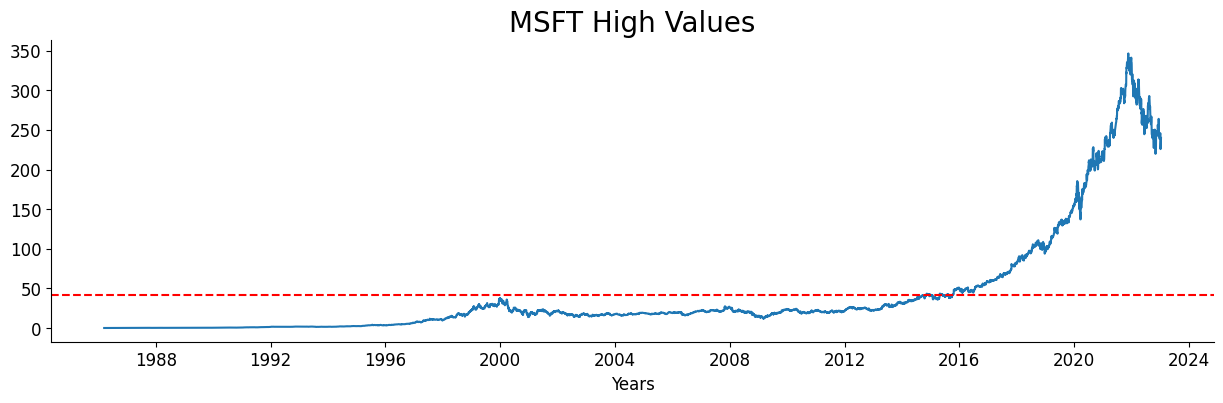

In [6]:
plt.figure(figsize=(15,4))
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Years')
plt.title('MSFT High Values', fontsize=20)
plt.plot(df.High)
plt.axhline(df.High.mean(), linestyle='--', color='red')
plt.show()

## Stationarity Check

Stationarity check is a method of testing whether a time series data is stationary or not. It is done by plotting the data in a graph and checking for any clear trend and seasonality. Stationarity can be determined by looking at the mean, variance, and autocorrelation of the data. 

If a time series is stationary, the mean, variance, and autocorrelation should remain constant over time. If the mean, variance, or autocorrelation change over time, the time series is non-stationary.

In [7]:
#Checking the stationarity of the data
result = ts.adfuller(df.High)

#Printing the test results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

#Interpreting the test results
if result[1] <= 0.05:
    print('The variable is stationary')
else:
    print('The variable is not stationary')

ADF Statistic: 2.278396
p-value: 0.998941
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
The variable is not stationary


## Seasonal Decomposition of the Series

- Seasonal Decomposition of a series is a statistical process used to remove seasonal patterns from a time series dataset. This process involves breaking down the data into three components: the trend, the seasonal component, and the residuals. 

- The trend component is a smooth representation of the series, the seasonal component is the characteristic pattern that repeats over time, and the residuals are the remaining variations in the data that are not explained by the trend and seasonal components. 

- Seasonal Decomposition can be done using various techniques, such as moving average, smoothing, and exponential smoothing.

In [8]:
results = seasonal_decompose(df.High, period=365)
trend = results.trend
seasonal = results.seasonal
residual = results.resid

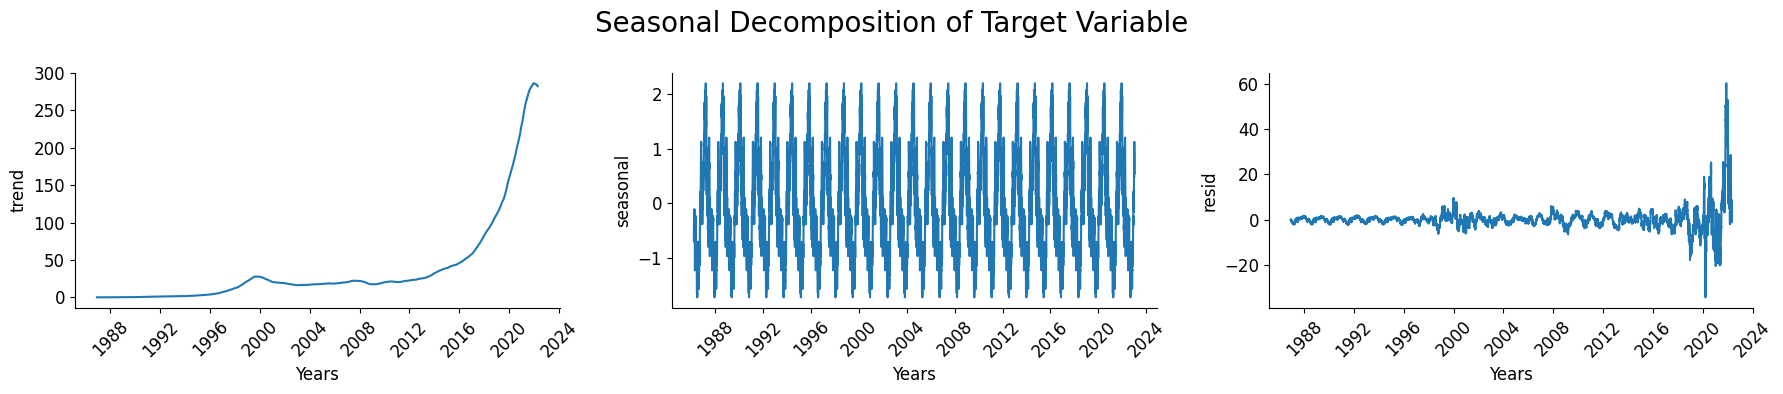

In [9]:
properties = [trend, seasonal, residual]
a = 1  # number of rows
b = 3  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(18,4))
fig.suptitle('Seasonal Decomposition of Target Variable', fontsize=20)
for i in properties:
    plt.subplot(a, b, c) 
    plt.plot(i)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.xlabel('Years')
    plt.ylabel(i.name)
    plt.xticks(rotation=45)
    c = c+1
plt.tight_layout()    
plt.show()

As Evident the variable is not stationary so we will have to go ahead and use the ARIMA model but before going there, we must find the p, d and q values

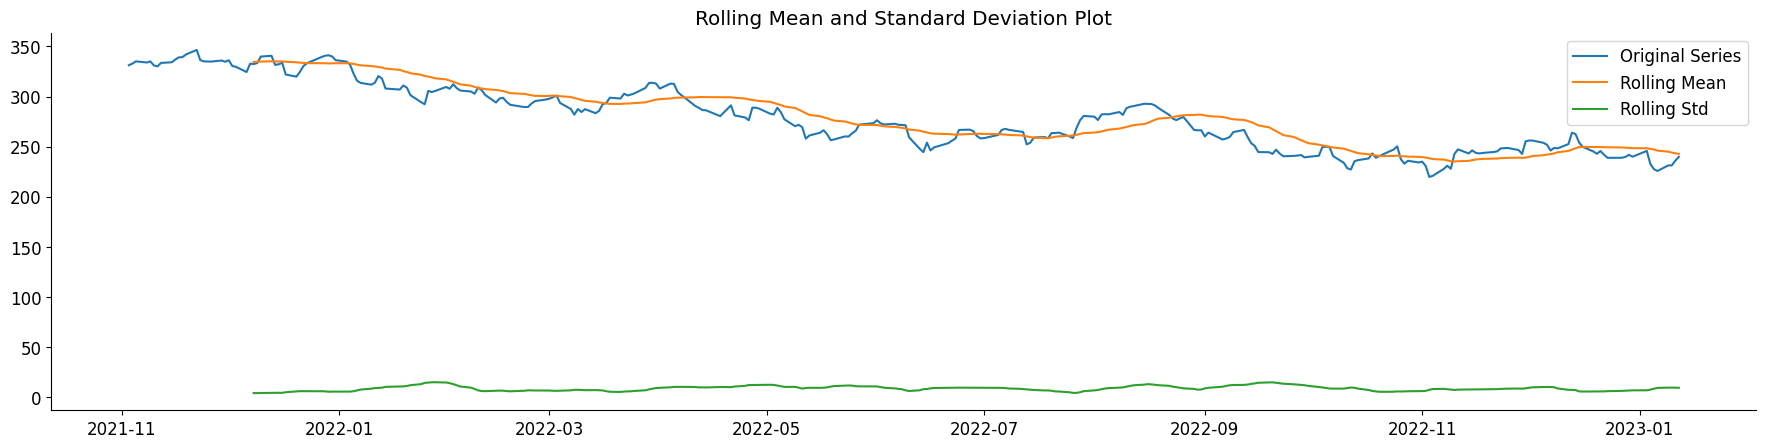

In [10]:
plt.figure(figsize=(22,5))
plt.plot(df['High'][-300:], label='Original Series')
plt.plot(df['High'][-300:].rolling(window=25).mean(), label='Rolling Mean')
plt.plot(df['High'][-300:].rolling(window=25).std(), label='Rolling Std')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Rolling Mean and Standard Deviation Plot')
plt.legend()
plt.show()

## Finding out the orders for p and q 

Using the ways shared above, we are going to go ahead and find the values of p,d and q.

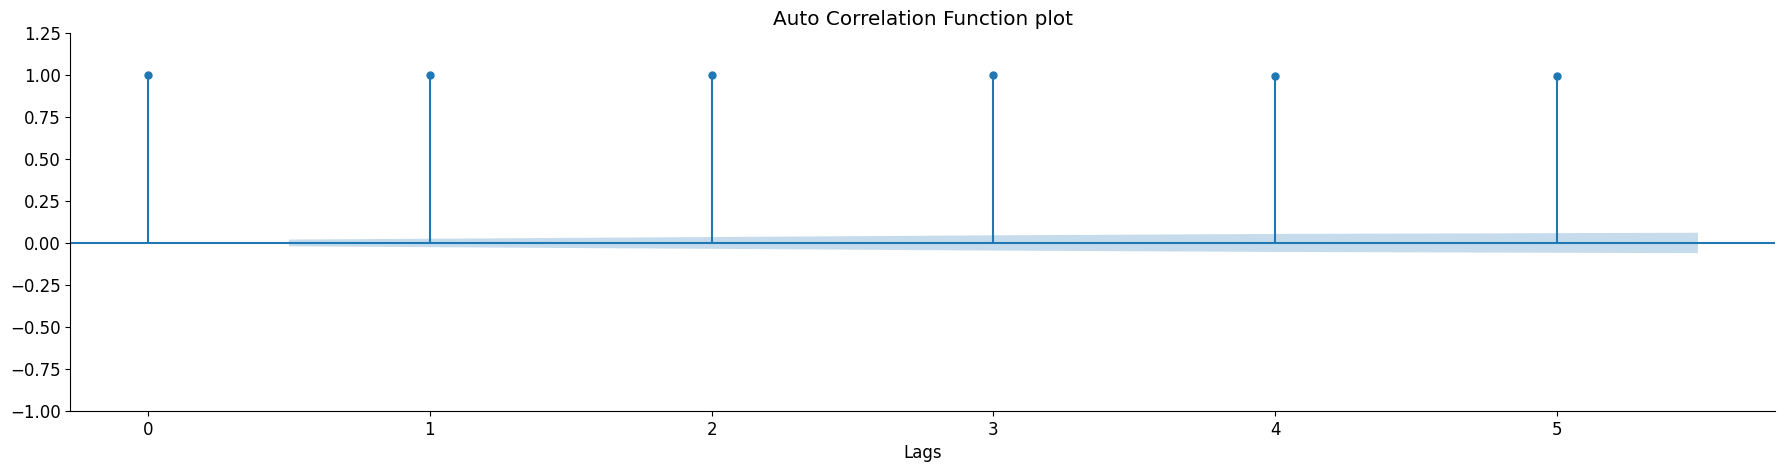

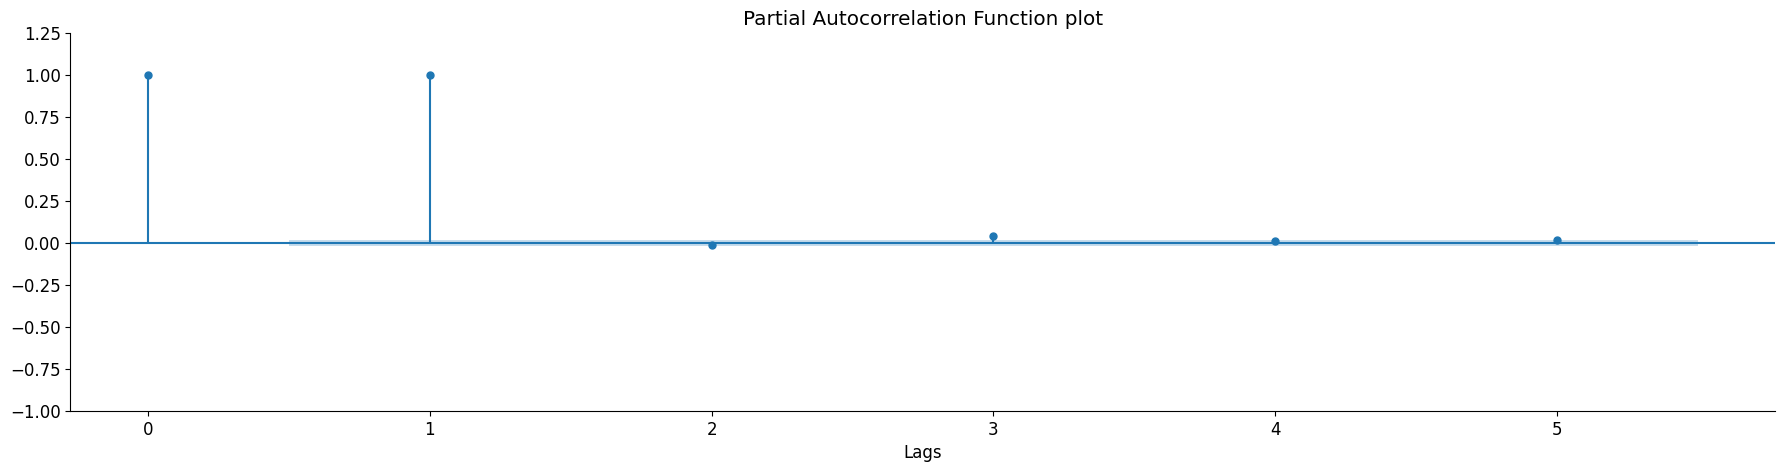

In [11]:
# plot the ACF plot
plot_acf(df.High, lags=5, title='Auto Correlation Function plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Lags')
plt.ylim(top=1.25)
plt.show()

# plot the PACF plot
plot_pacf(df.High, lags=5, title='Partial Autocorrelation Function plot')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Lags')
plt.ylim(top=1.25)
plt.show()

## For Integrated Order (d)

- Integrated order (I) is a parameter in an ARIMA model that refers to the number of times the data have been differenced in order to make it stationary. 

- A value of 0 indicates that the data has not been differenced, while a value of 1 indicates that the data has been differenced once. Higher values indicate that the data has been differenced multiple times.

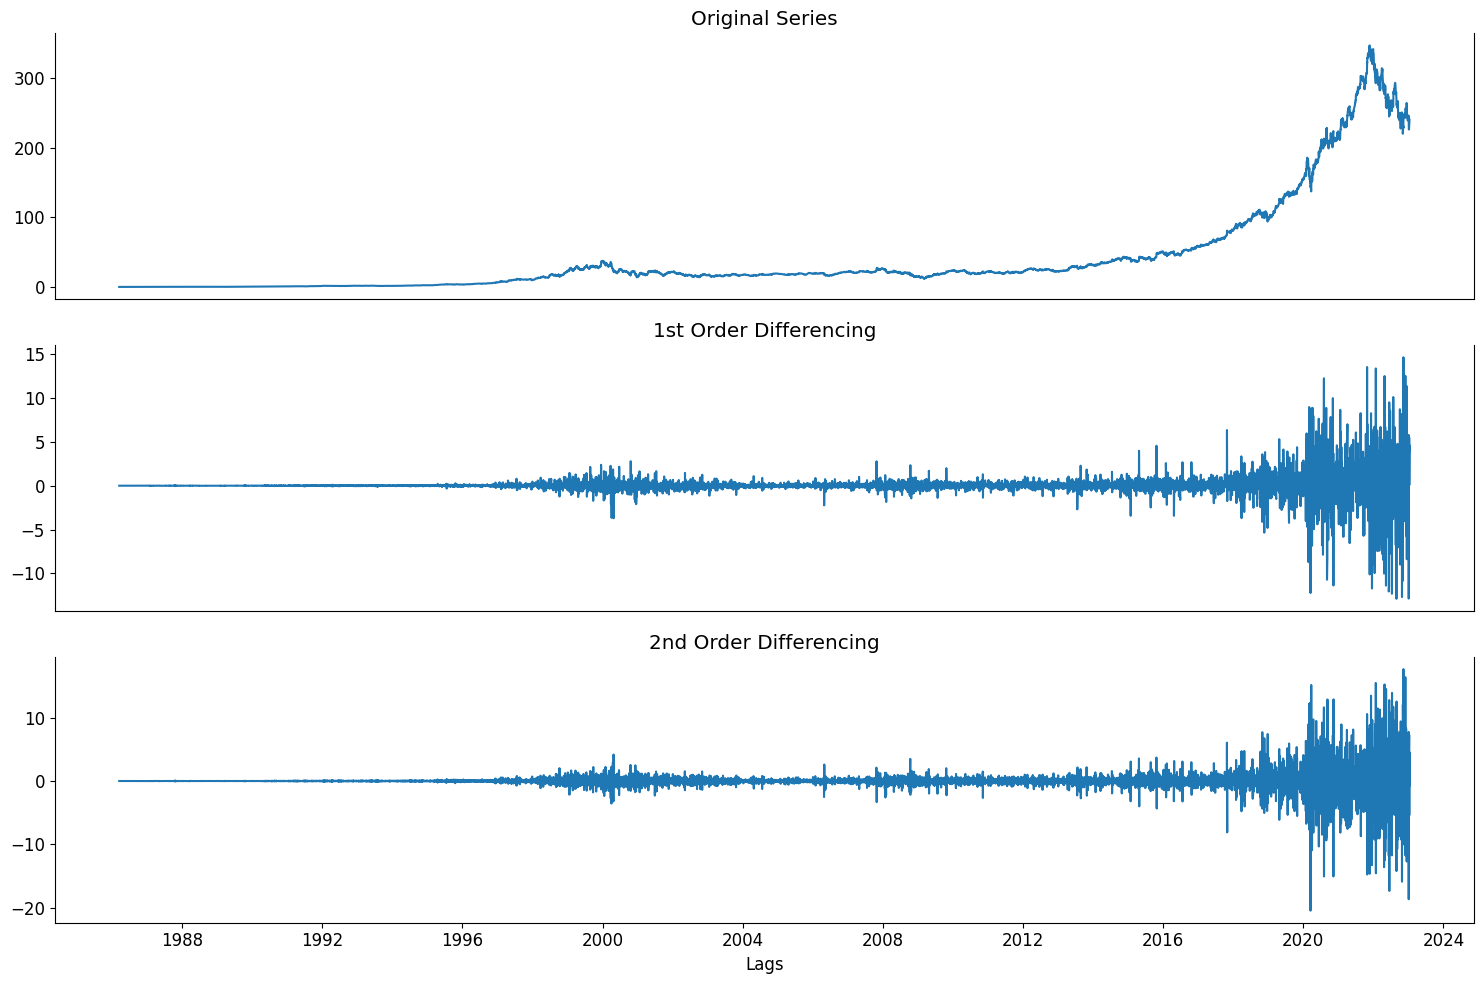

In [12]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
ax1.plot(df.High); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
ax1.spines['top'].set_visible(False)

# 1st Differencing
ax2.plot(df.High.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
ax2.spines['top'].set_visible(False)

# 2nd Differencing
ax3.plot(df.High.diff().diff()); ax3.set_title('2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.xlabel('Lags')
plt.tight_layout()
plt.show()

d = 1 because the series has become stationary

## For MA Order (q)

- A moving average model is a type of time series model that uses historical data to forecast future values. It is a simple and widely used technique that can be used to smooth out short-term fluctuations in data and highlight longer-term trends and cycles. 

- The model is based on the idea that the value of a time series at any given point is a function of the average of the values of the previous few points. The number of points used to calculate the average is called the window size.

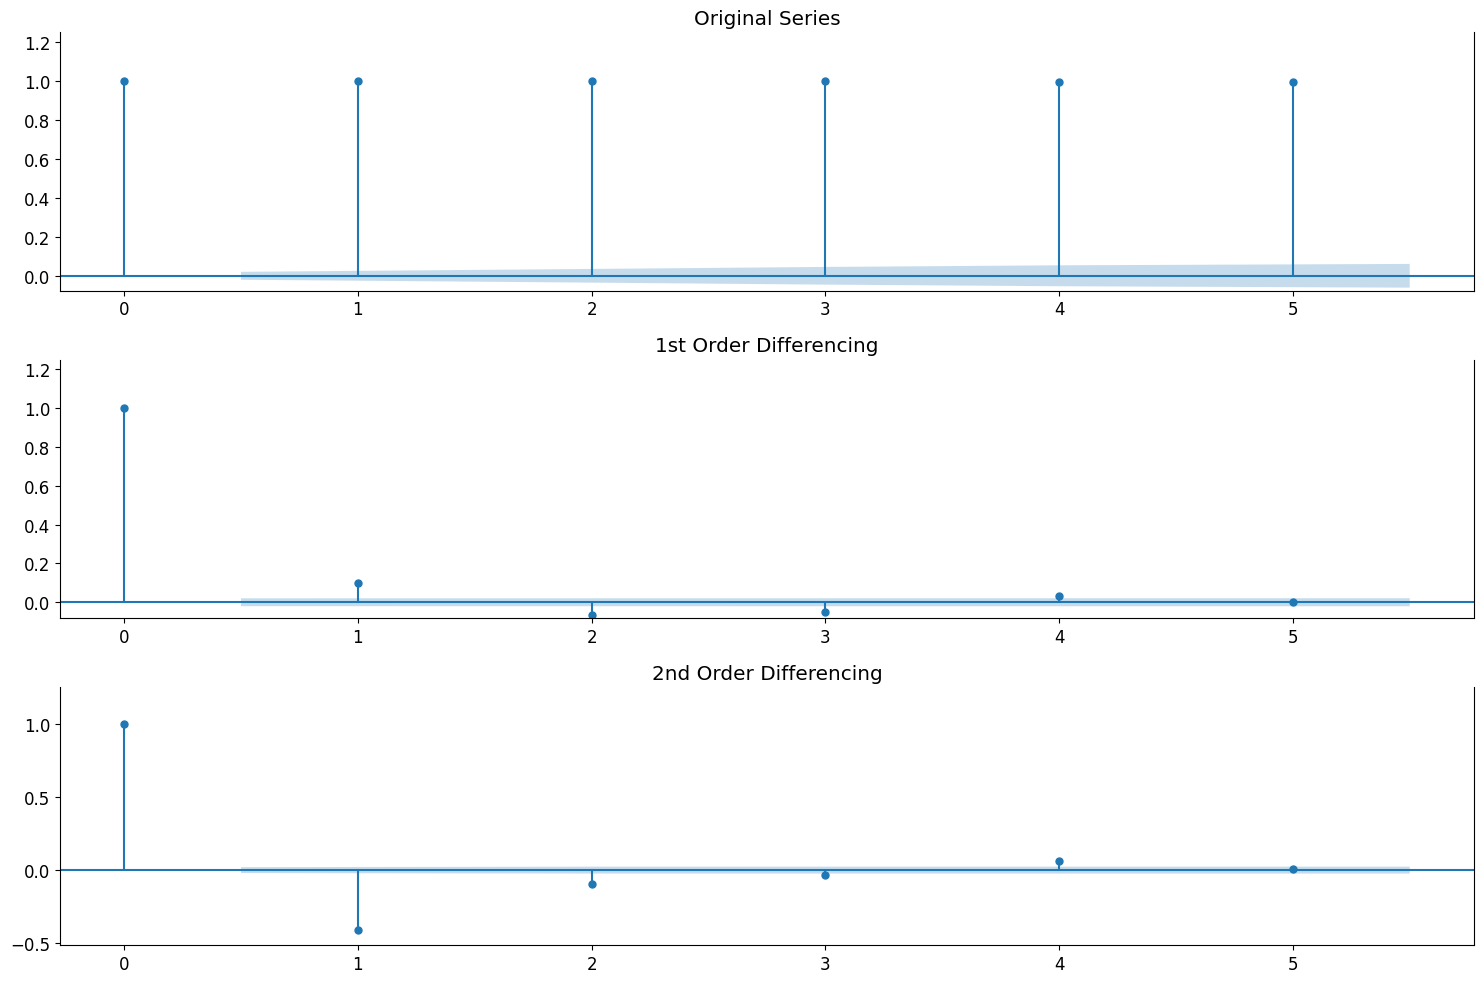

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
plot_acf(df.High, ax=ax1, auto_ylims=True, lags = 5,title = 'Original Series')
ax1.spines['top'].set_visible(False)

plot_acf(df.High.diff().dropna(), auto_ylims=True, lags = 5, ax=ax2,title = '1st Order Differencing')
ax2.spines['top'].set_visible(False)

plot_acf(df.High.diff().diff().dropna(), auto_ylims=True, lags = 5, ax=ax3, title= '2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

## For AR order (p)


- An autoregressive (AR) model is a type of a statistical model used in time series analysis that uses observations from the past to predict future values. 

- It is a type of regression analysis where the output variable (Y) is modeled as a linear function of its own past values and a noise term (epsilon). 

- AR models are used to describe and analyze time-dependent phenomena such as stock prices, economic cycles, and ecological phenomena.


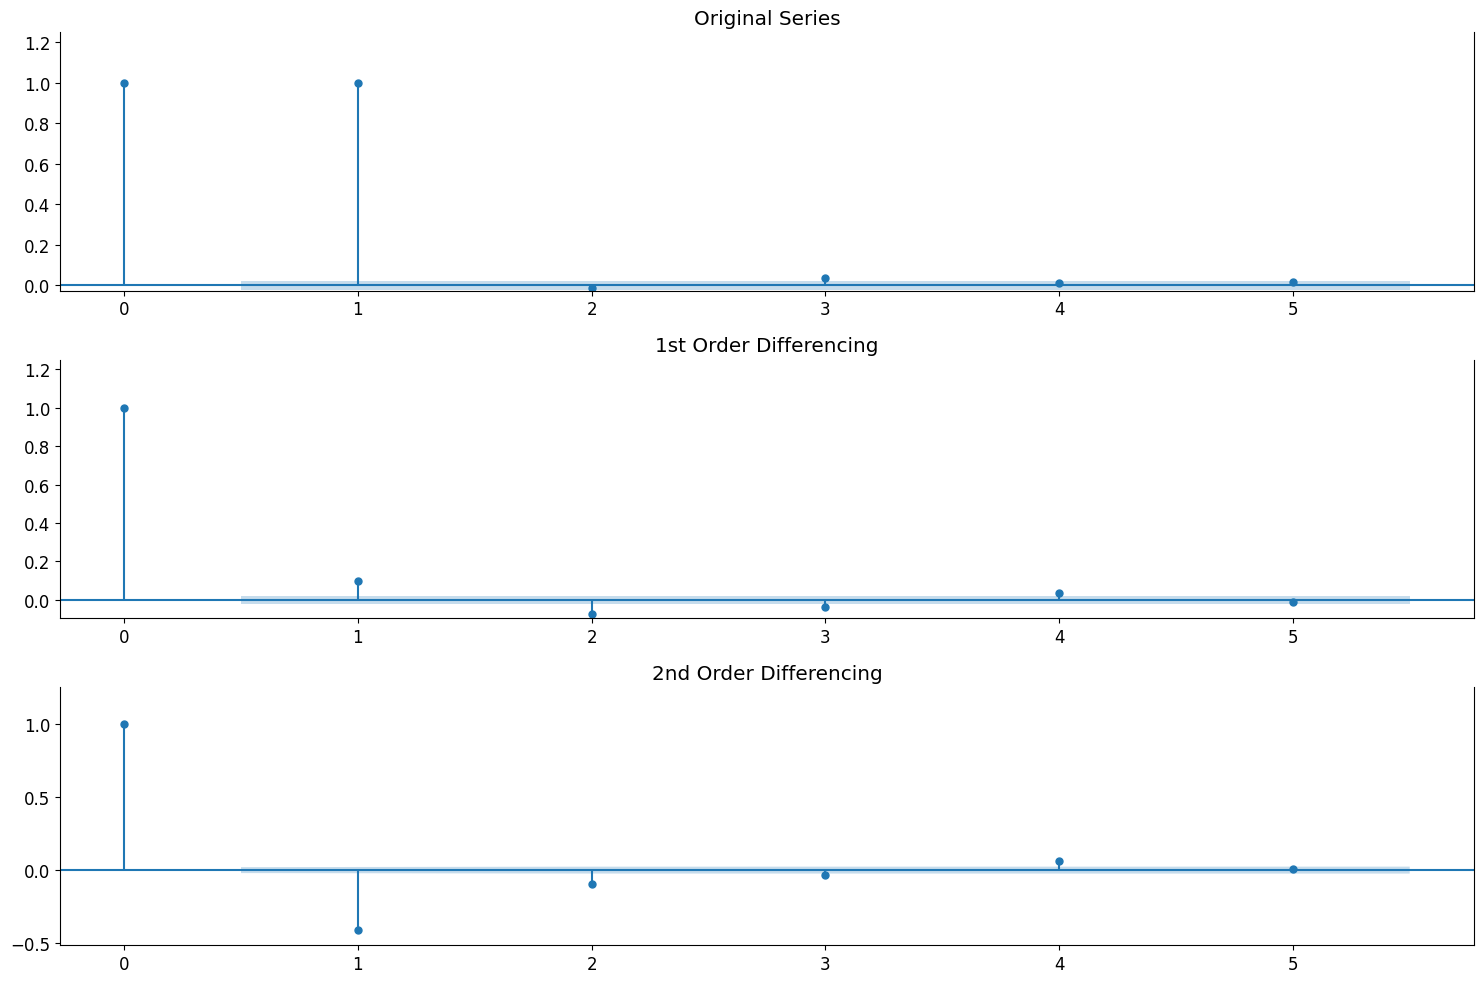

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15, 10))
plot_pacf(df.High, auto_ylims=True, lags = 5, ax=ax1, title = 'Original Series')
ax1.spines['top'].set_visible(False)

plot_pacf(df.High.diff().dropna(),auto_ylims=True, lags =5, ax=ax2,title = '1st Order Differencing')
ax2.spines['top'].set_visible(False)

plot_acf(df.High.diff().diff().dropna(), auto_ylims=True, lags =5, ax=ax3, title= '2nd Order Differencing')
ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

## Fitting an ARIMA Model

Let's go ahead and fit the ARIMA Model

In [15]:
model = sm.tsa.arima.ARIMA(df.High, order=(1, 1, 1))          #(p,d,q)
model_fit = model.fit()
model_fit.summary()

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                 9285
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14702.391
Date:                Fri, 13 Jan 2023   AIC                          29410.781
Time:                        07:22:26   BIC                          29432.190
Sample:                             0   HQIC                         29418.055
                               - 9285                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2100      0.030     -7.080      0.000      -0.268      -0.152
ma.L1          0.3190      0.029     11.050      0.000       0.262       0.376
sigma2         1.3901      0.004    312.918      0.000       1.381       1.399
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):            656815.50
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):             803.05   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                        44.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- AIC stands for Akaike Information Criterion. It is a measure of the relative quality of statistical models for a given set of data. AIC measures the trade-off between the goodness of fit of the model and the complexity of the model. The lower the AIC, the better the model. In an ARIMA model, AIC is used to compare different models and select the best one.

- BIC (Bayesian Information Criterion) is a measure of fit for an ARIMA model. It is a measure of the relative quality of a model compared to other models. It is calculated by taking the log-likelihood of the model and subtracting a penalty term for the number of parameters in the model. The lower the BIC, the better the model.

In [16]:
print(f'Akaike Information criterion : {model_fit.aic}')
print(f'Bayesian Information Criterion : {model_fit.bic}')

Akaike Information criterion : 29410.781428986473
Bayesian Information Criterion : 29432.189572288655


## Making predictions

In [17]:
predictions = model_fit.predict().values
highdf['Predictions'] = predictions

In [18]:
highdf

,High,Predictions
Date,,
1986-03-13 00:00:00-05:00,0.063524,0.000000
1986-03-14 00:00:00-05:00,0.064067,0.063524
1986-03-17 00:00:00-05:00,0.064609,0.064124
1986-03-18 00:00:00-05:00,0.064609,0.064650
1986-03-19 00:00:00-05:00,0.062980,0.064596
...,...,...
2023-01-06 00:00:00-05:00,225.759995,227.491449
2023-01-09 00:00:00-05:00,231.240005,225.583482
2023-01-10 00:00:00-05:00,231.309998,231.893895


## Plotting Predictions

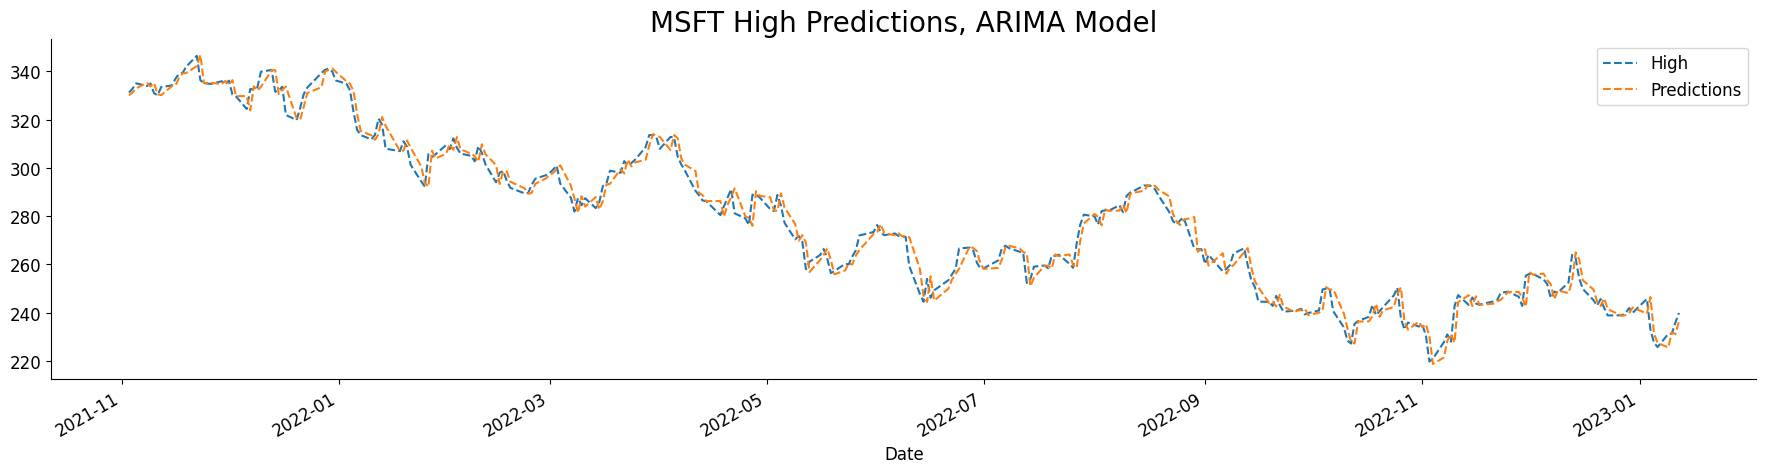

In [19]:
highdf[-300:].plot(linestyle='--')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('MSFT High Predictions, ARIMA Model', fontsize=20)
plt.show()

## Calculating the Error

For Evaluating how far off or close we are to the actuals, we are going to go ahead and use something known as Root Mean Squared Error.

Root Mean Squared Error (RMSE) is a measure of how well a model fits a given dataset. It measures the average difference between the predicted values and the actual values in a dataset. The lower the RMSE, the better the model fits the data. It is often used in regression models to measure the accuracy of predictions.

In [20]:
rmse = np.sqrt(mean_squared_error(highdf.High,highdf.Predictions))
print(f'The Root Mean Squared Error between the Actuals and the Predictions is {round(rmse,4)}')

The Root Mean Squared Error between the Actuals and the Predictions is 1.179


## Making Forecast

The forecast for the future in ARIMA is made by using the historical data from the time series data. ARIMA models analyze the time series data, identify patterns, and then use those patterns to predict future values. 

The model takes into account the seasonality, trend, and level of the data in order to make an accurate forecast. The model can also incorporate exogenous variables, such as economic indicators and other external factors, to create more accurate forecasts.

In [21]:
#Plotting for future
forecast = model_fit.forecast(steps=10)
dates = pd.date_range(start='2023-01-12', periods=10)
forecast_df=pd.DataFrame({'Date': dates, 'Predictions': forecast})
forecast_df.index=forecast_df['Date']
forecast_df.drop('Date', axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


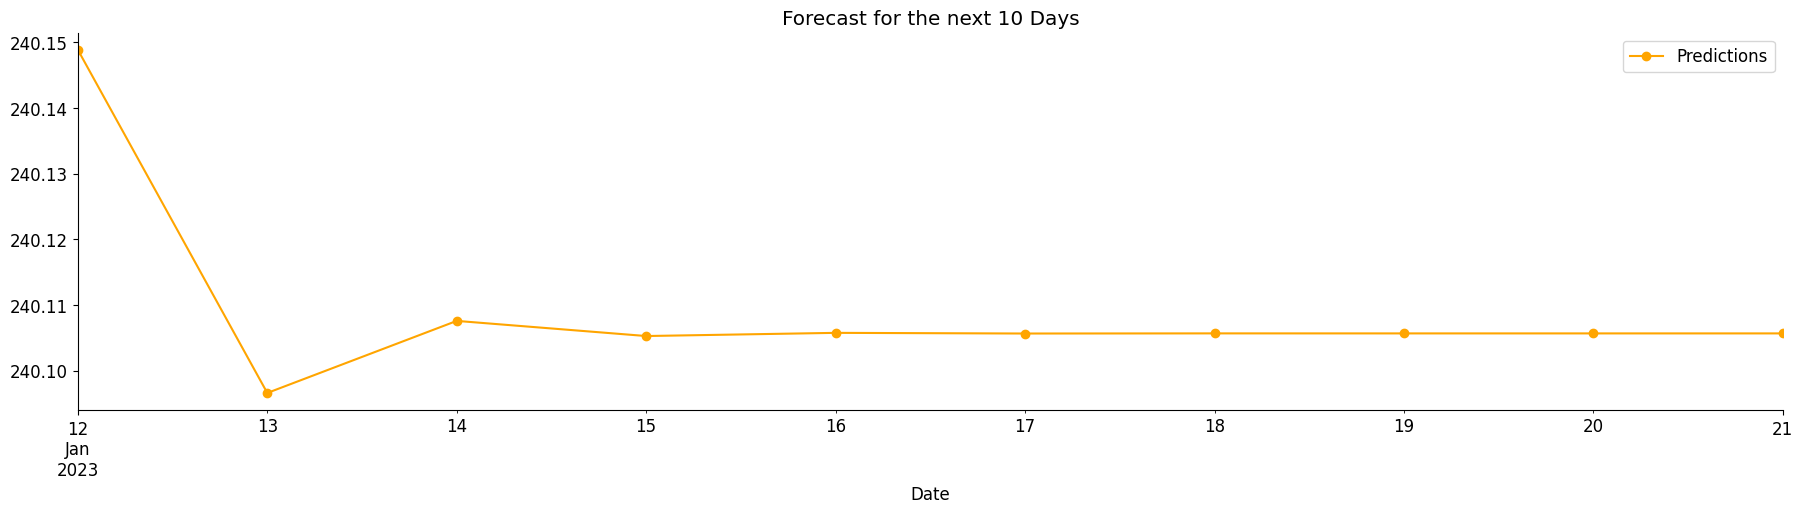

In [22]:
forecast_df.plot(marker='o', color='orange')
plt.title('Forecast for the next 10 Days')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

## Multivariate ARIMAX Predictions

The benefits of multivariate time series include its ability to capture the complexity of a system and identify relationships between multiple variables. Additionally, multivariate time series analysis can be used to make predictions about future events with a high degree of accuracy.

However, the disadvantage of multivariate time series is that it can be more complex and difficult to interpret. Since multiple variables are being analyzed, it may be more difficult to identify patterns and trends in the data. Additionally, multivariate time series analysis may require more advanced statistical techniques and expertise.

In [23]:
stock_df = df[['Open', 'High', 'Low', 'Close']]

In [24]:
stock_df

,Open,High,Low,Close
Date,,,,
1986-03-13 00:00:00-05:00,0.055380,0.063524,0.055380,0.060809
1986-03-14 00:00:00-05:00,0.060809,0.064067,0.060809,0.062980
1986-03-17 00:00:00-05:00,0.062980,0.064609,0.062980,0.064067
1986-03-18 00:00:00-05:00,0.064067,0.064609,0.061894,0.062437
1986-03-19 00:00:00-05:00,0.062437,0.062980,0.060809,0.061351
...,...,...,...,...
2023-01-06 00:00:00-05:00,223.000000,225.759995,219.350006,224.929993
2023-01-09 00:00:00-05:00,226.449997,231.240005,226.410004,227.119995
2023-01-10 00:00:00-05:00,227.759995,231.309998,227.330002,228.850006


In [25]:
columns = ['Open', 'High', 'Low', 'Close']
for i in columns:
    #Checking the stationarity of the data
    result = ts.adfuller(stock_df[i])
    print(i)
    #Printing the test results
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    #Interpreting the test results
    if result[1] <= 0.05:
        print(f'{i} is stationary')
    else:
        print(f'{i} is not stationary')
    print(' ')

Open
ADF Statistic: 2.127275
p-value: 0.998817
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Open is not stationary
 
High
ADF Statistic: 2.278396
p-value: 0.998941
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
High is not stationary
 
Low
ADF Statistic: 2.060690
p-value: 0.998747
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Low is not stationary
 
Close
ADF Statistic: 2.146625
p-value: 0.998836
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Close is not stationary
 


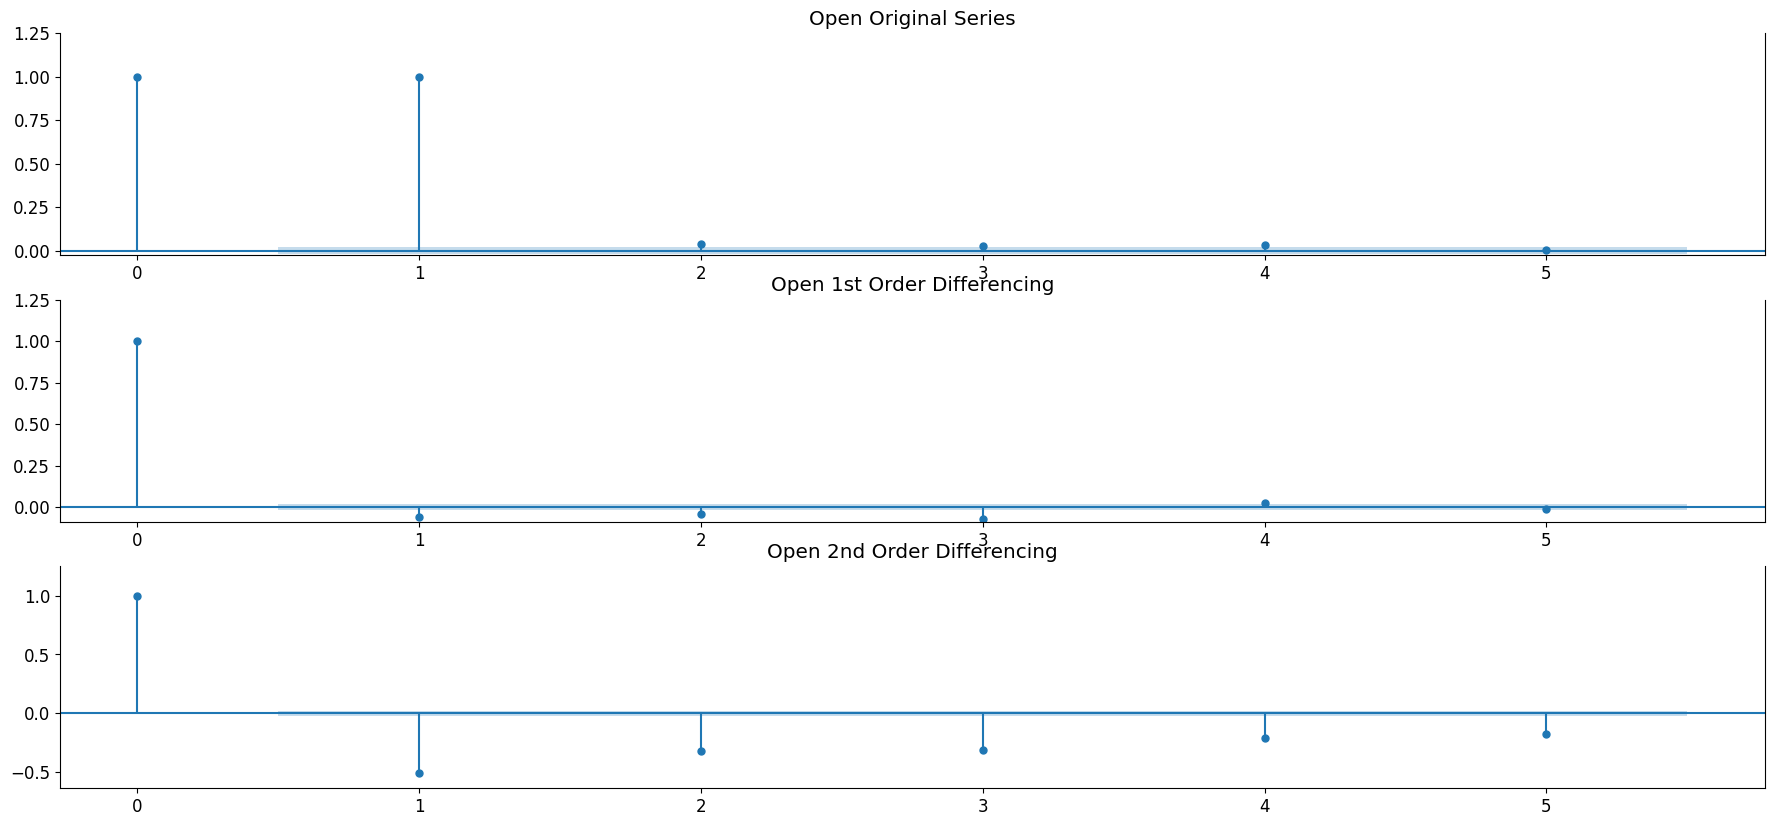

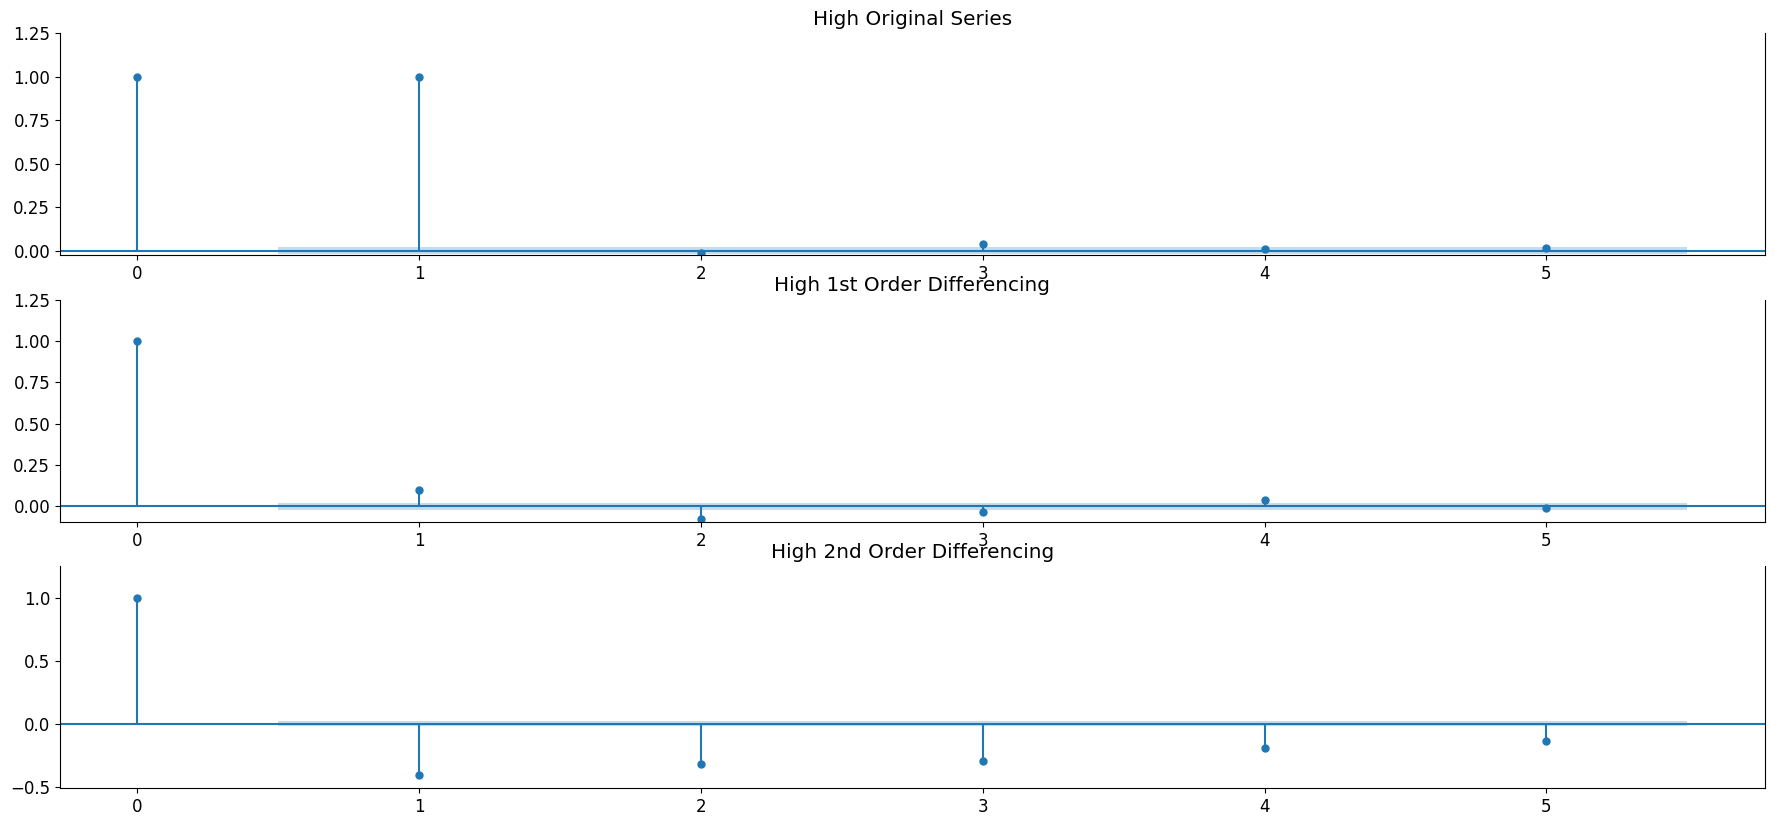

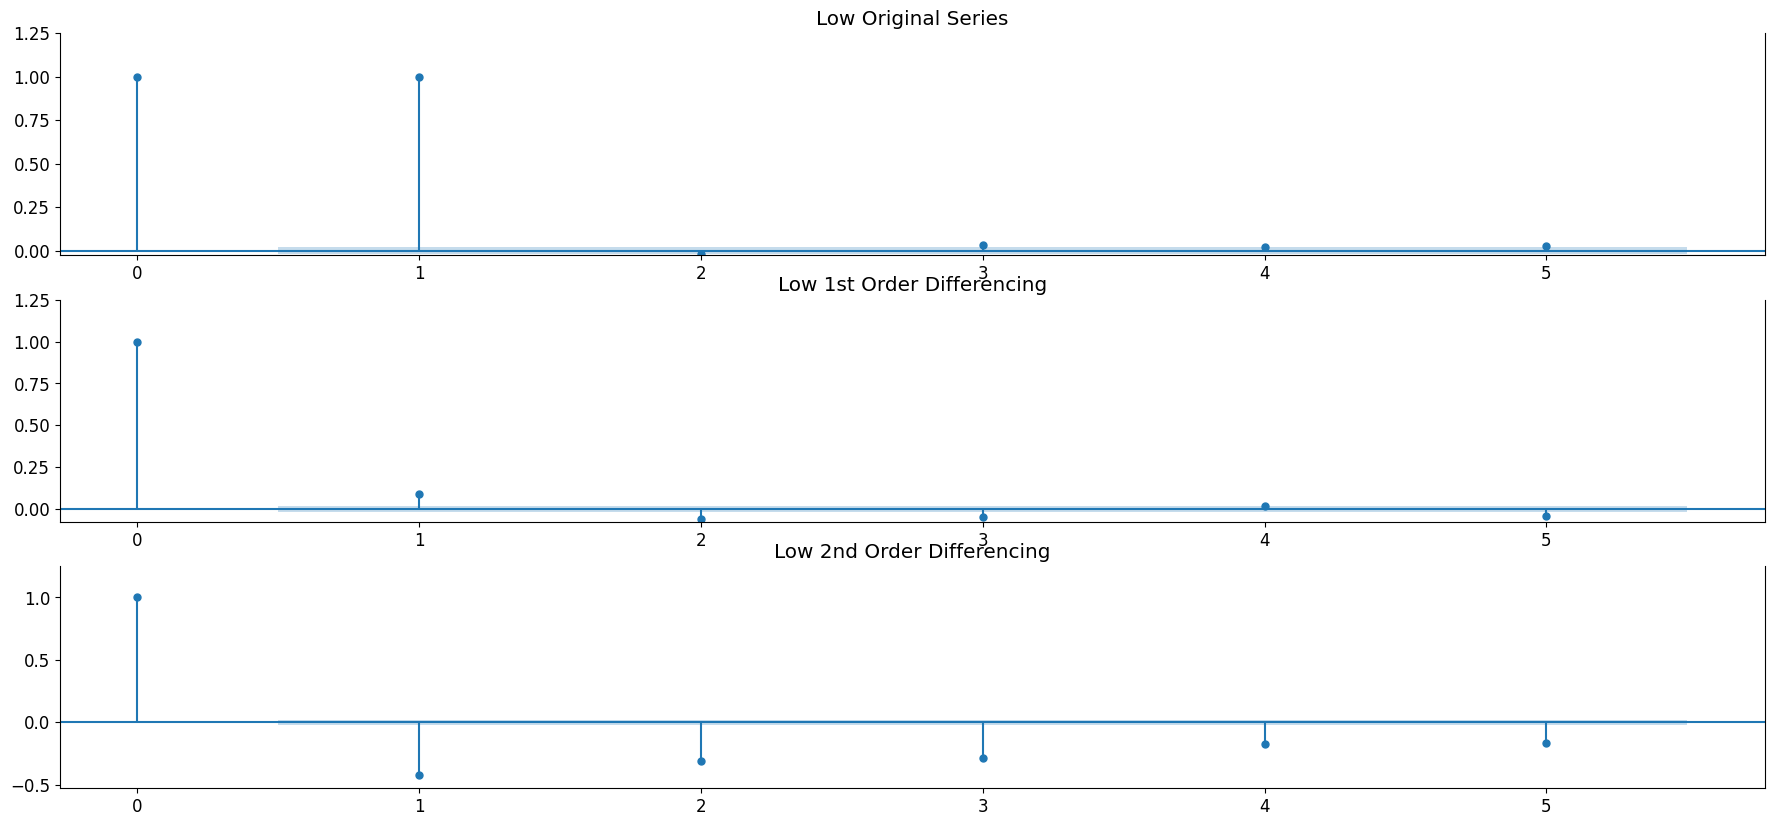

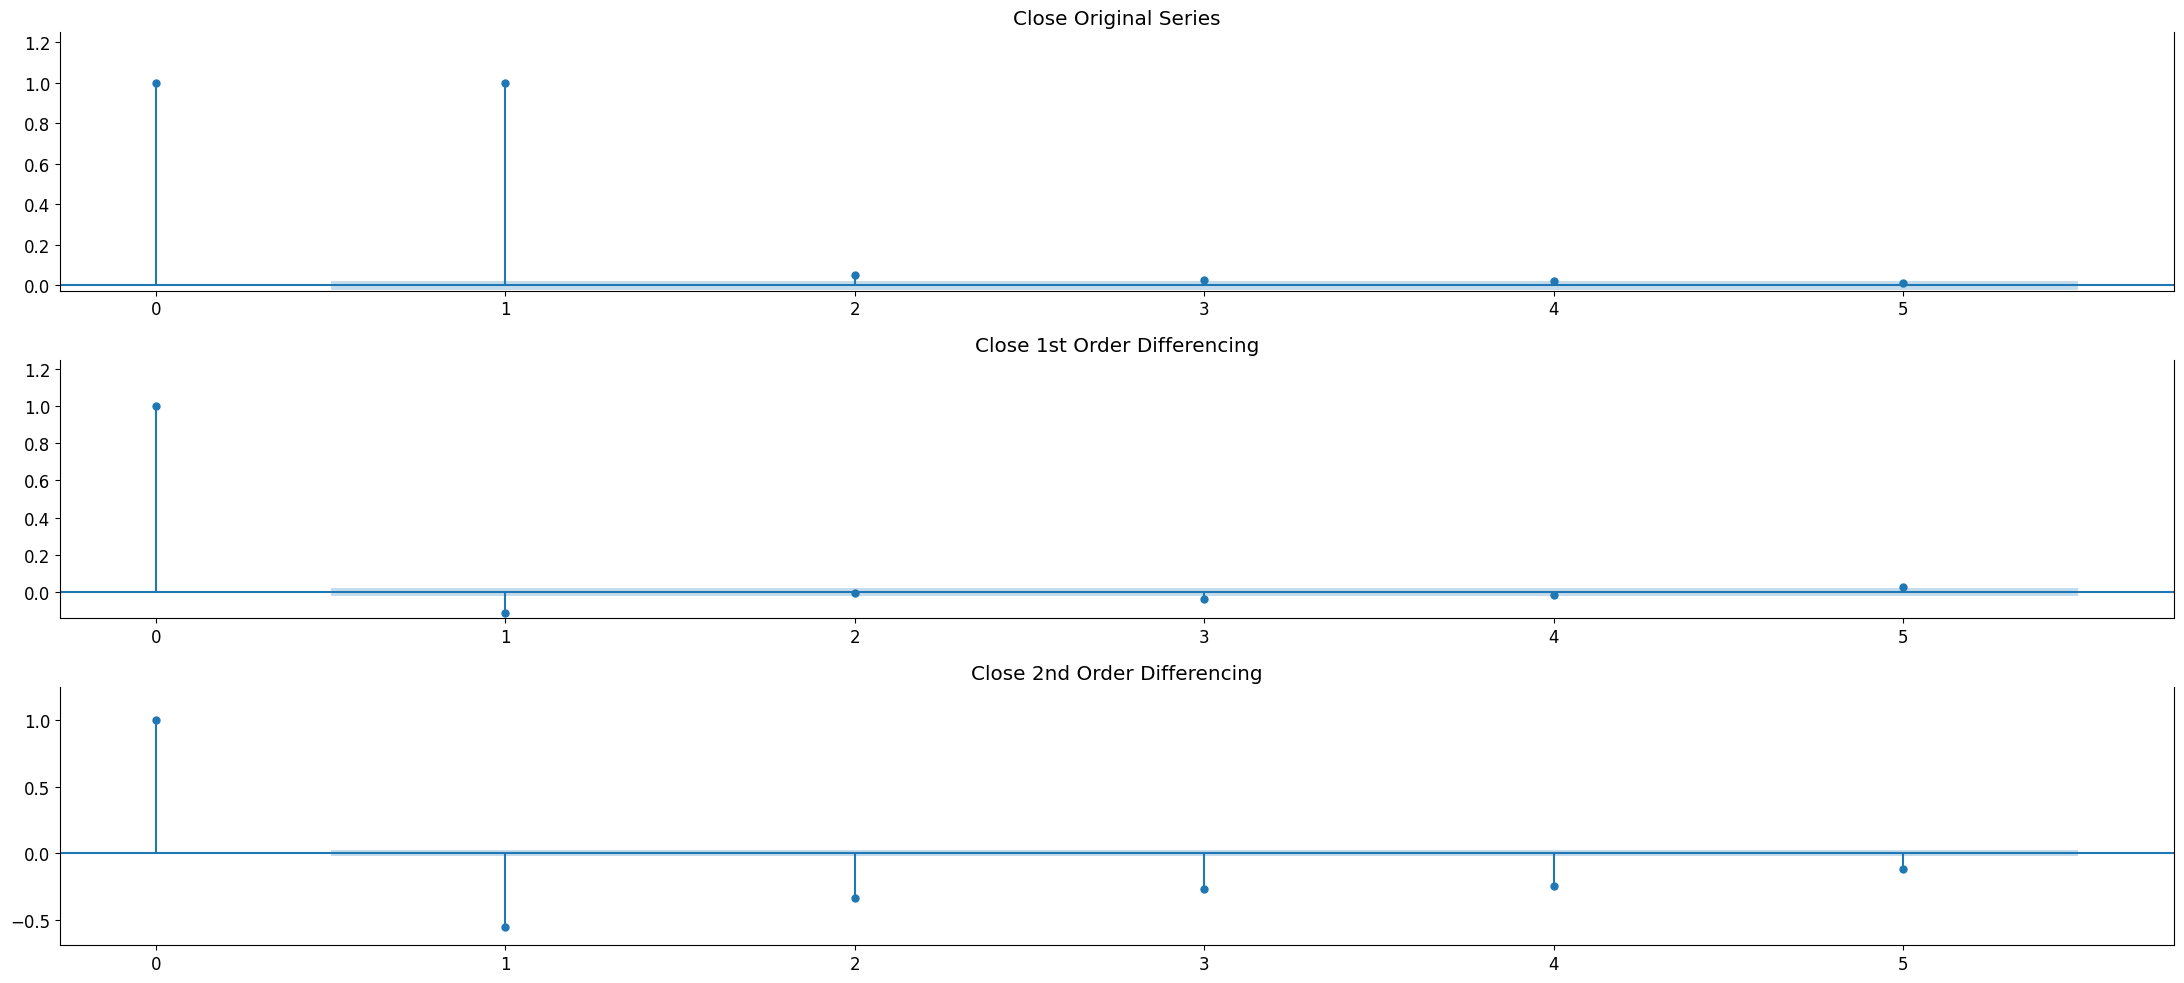

In [26]:
for i in columns:
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(22, 10))
    plot_pacf(stock_df[i], auto_ylims=True, lags = 5, ax=ax1, title = f'{i} Original Series')
    ax1.spines['top'].set_visible(False)

    plot_pacf(stock_df[i].diff().dropna(),auto_ylims=True, lags =5, ax=ax2,title = f'{i} 1st Order Differencing')
    ax2.spines['top'].set_visible(False)

    plot_pacf(stock_df[i].diff().diff().dropna(), auto_ylims=True, lags =5, ax=ax3, title= f'{i} 2nd Order Differencing')
    ax3.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

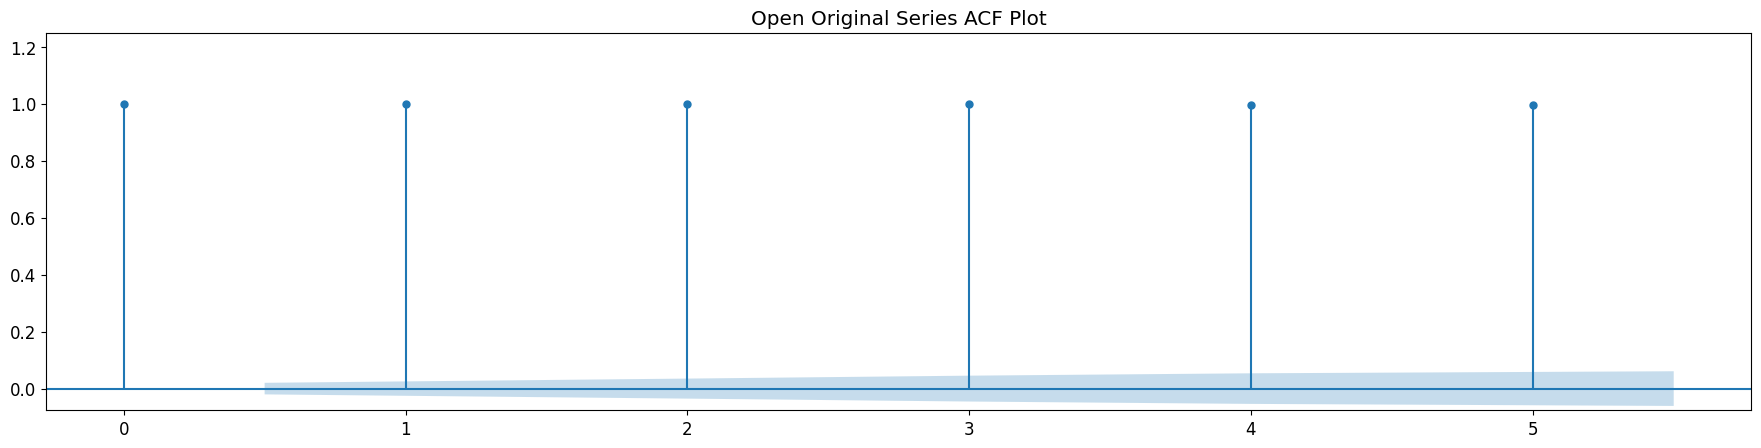

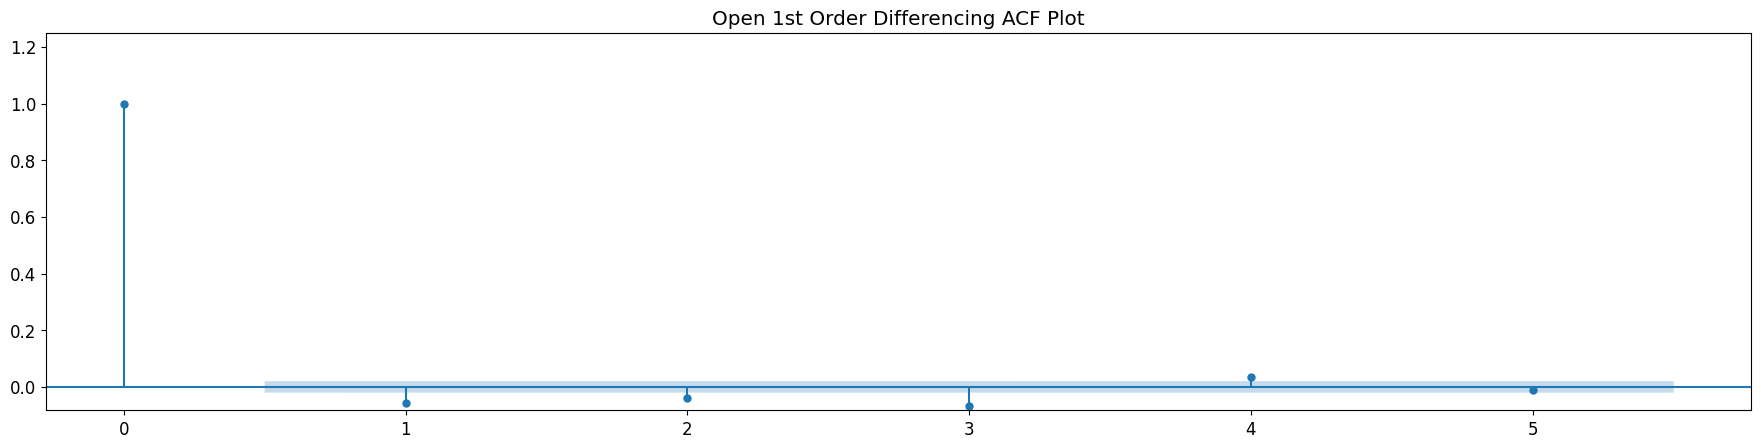

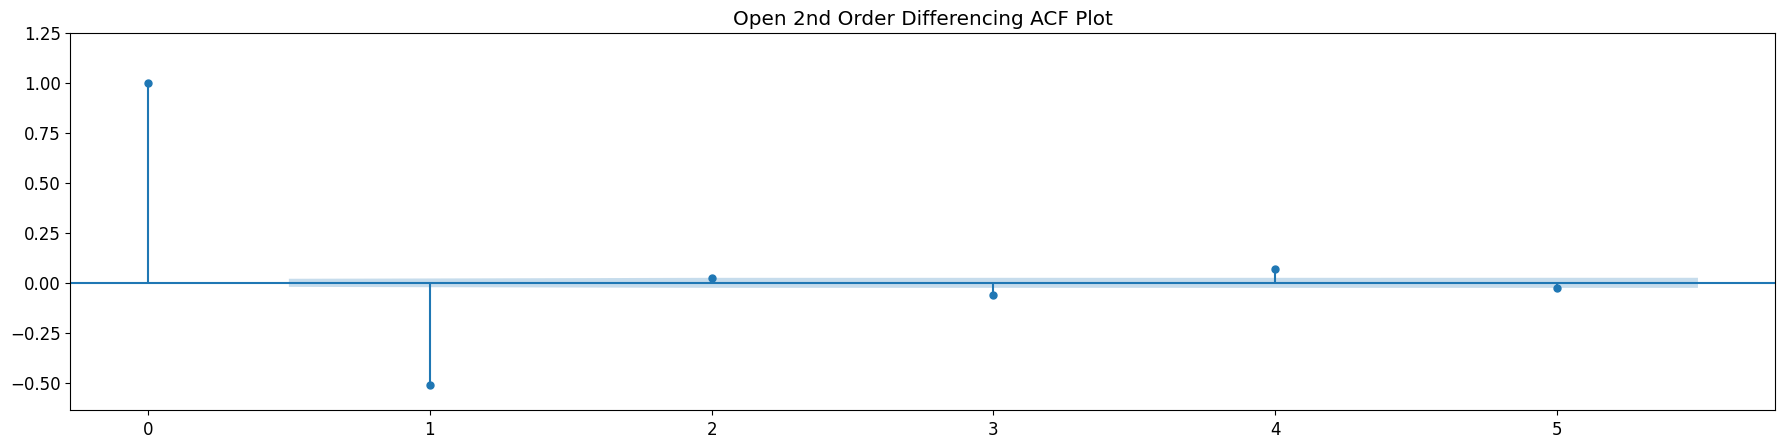

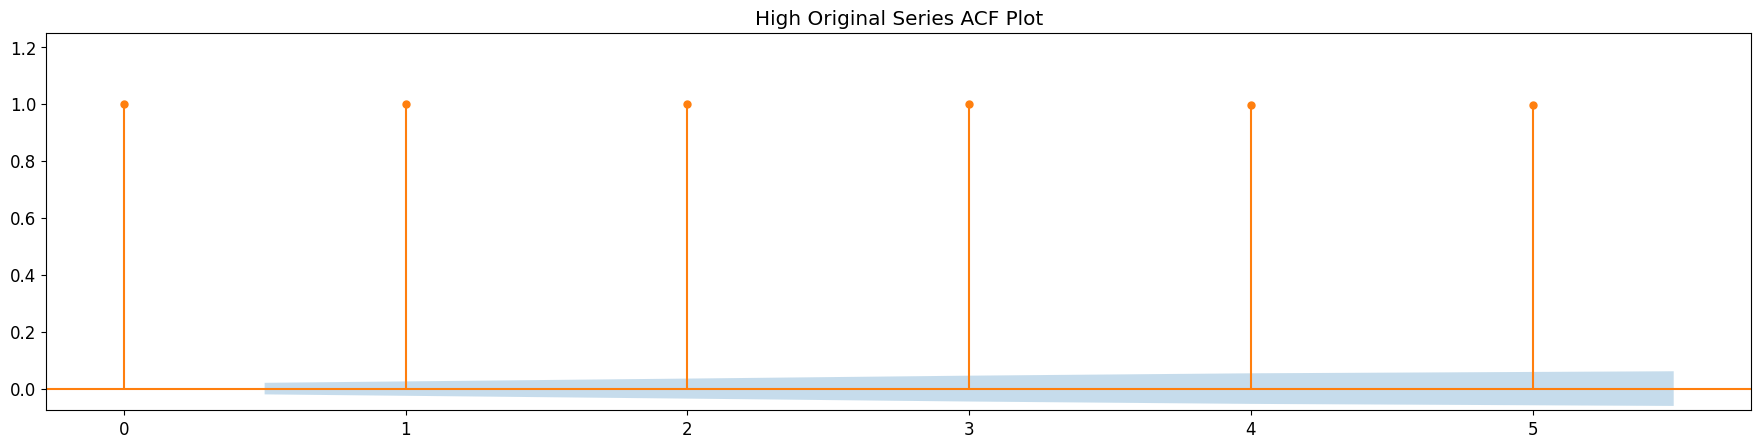

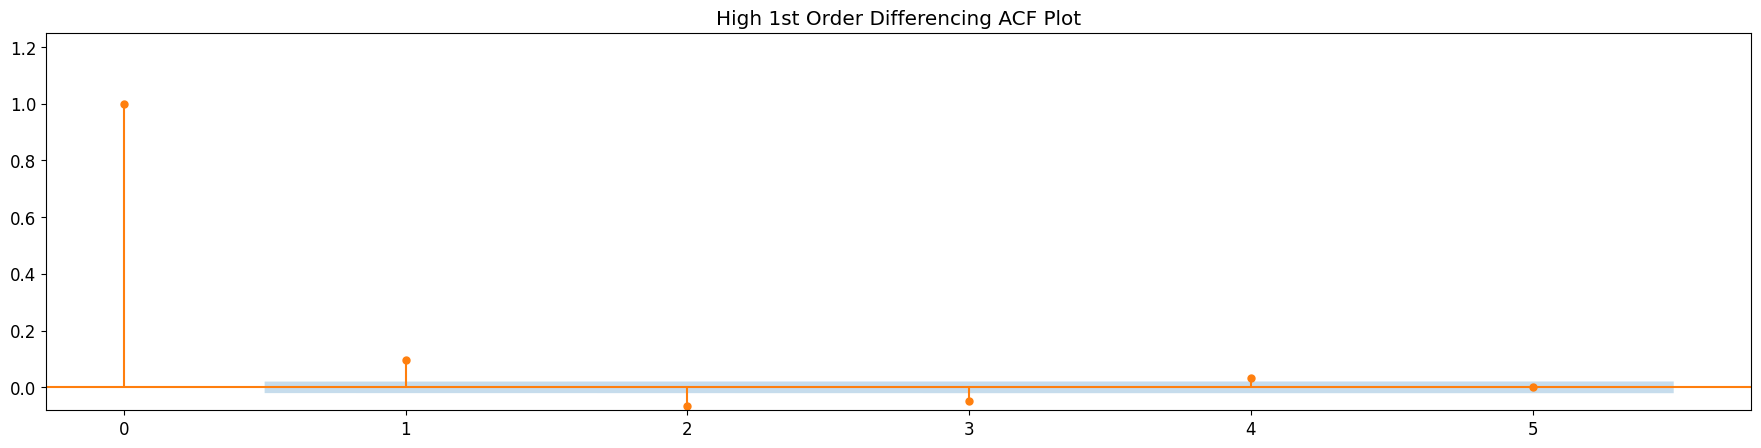

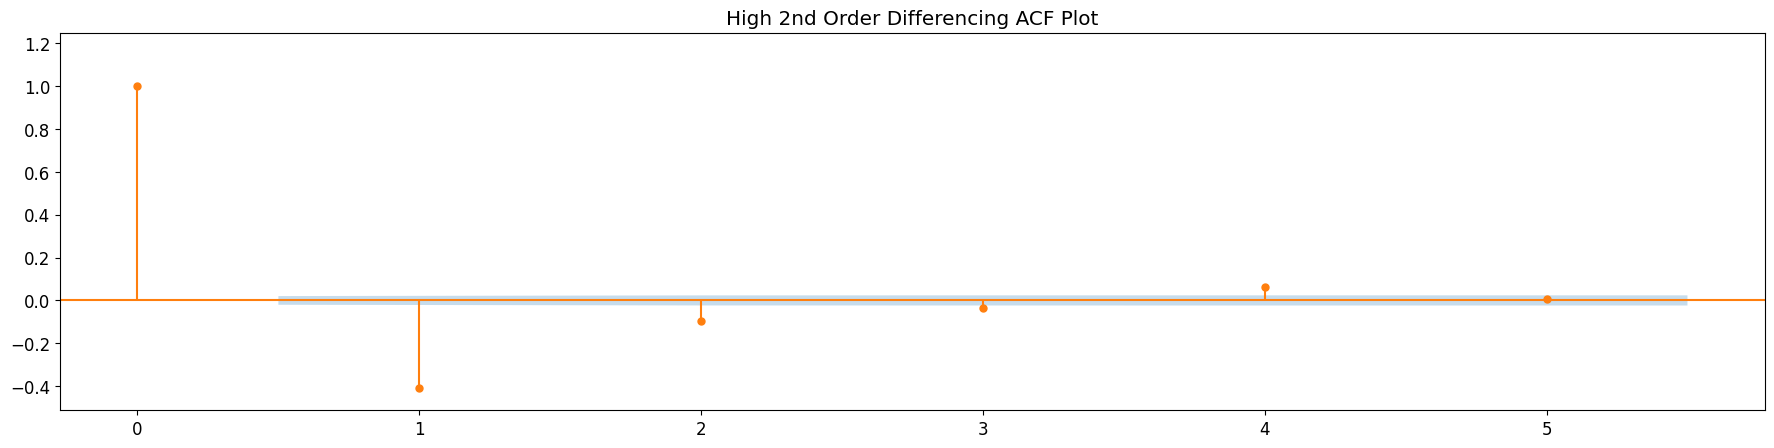

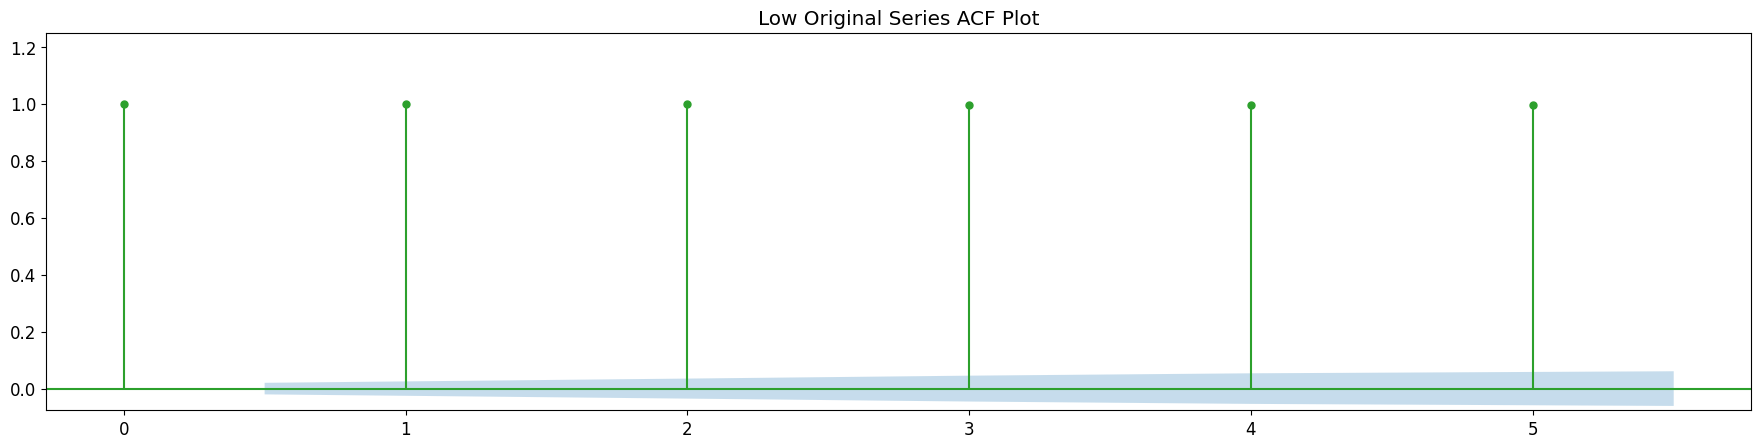

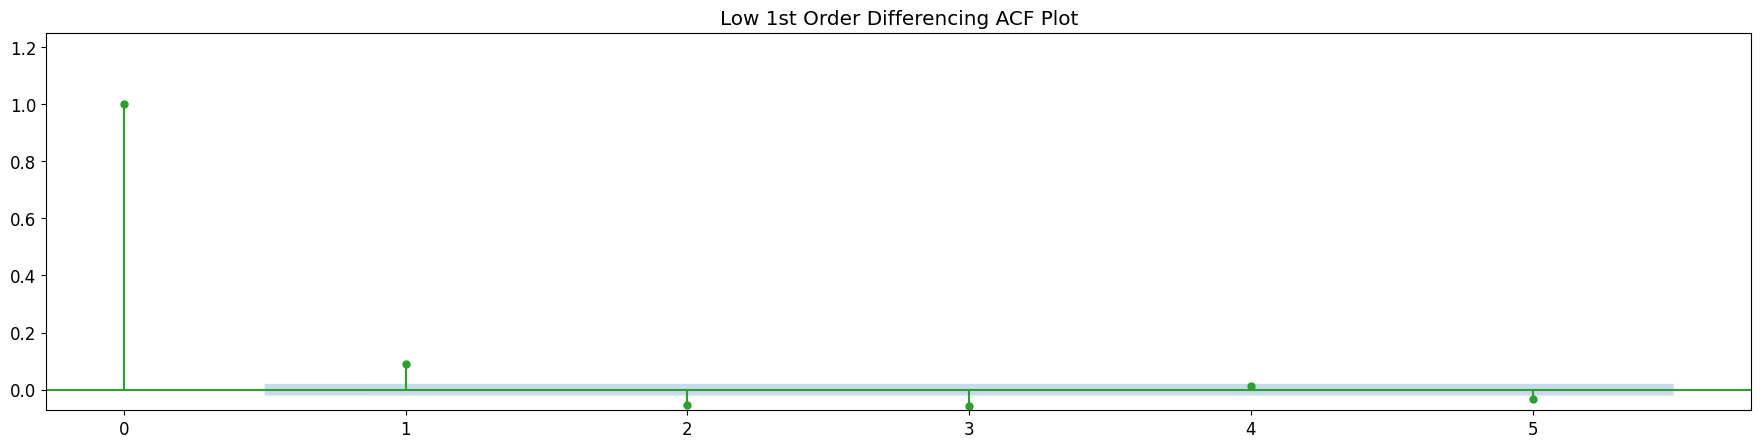

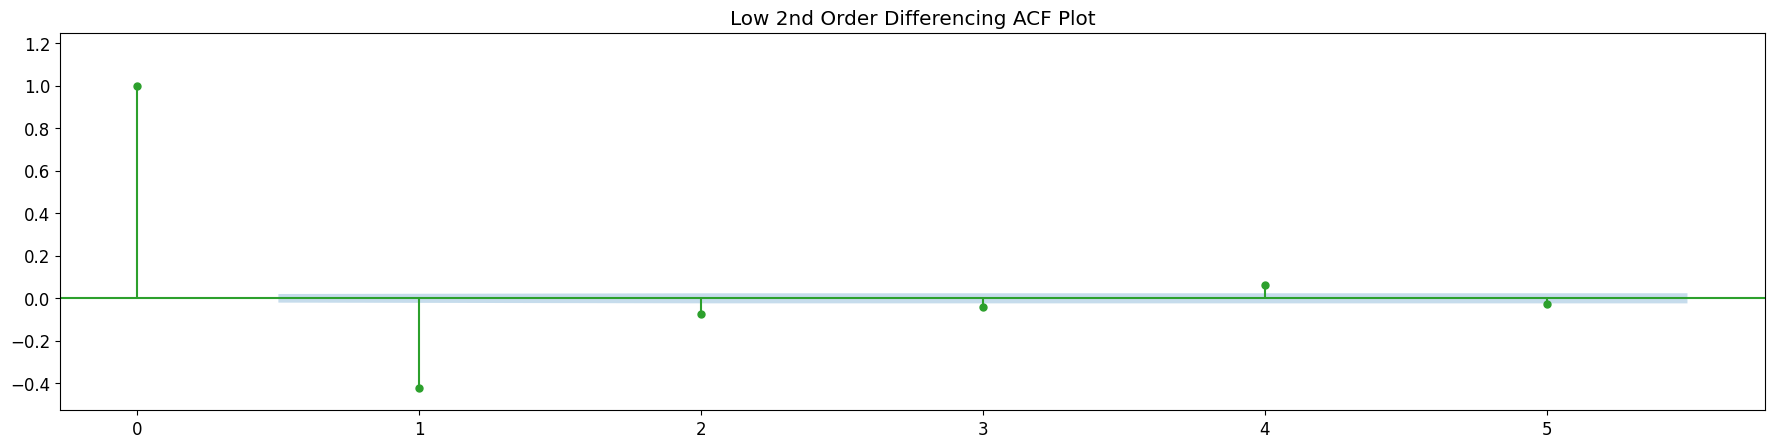

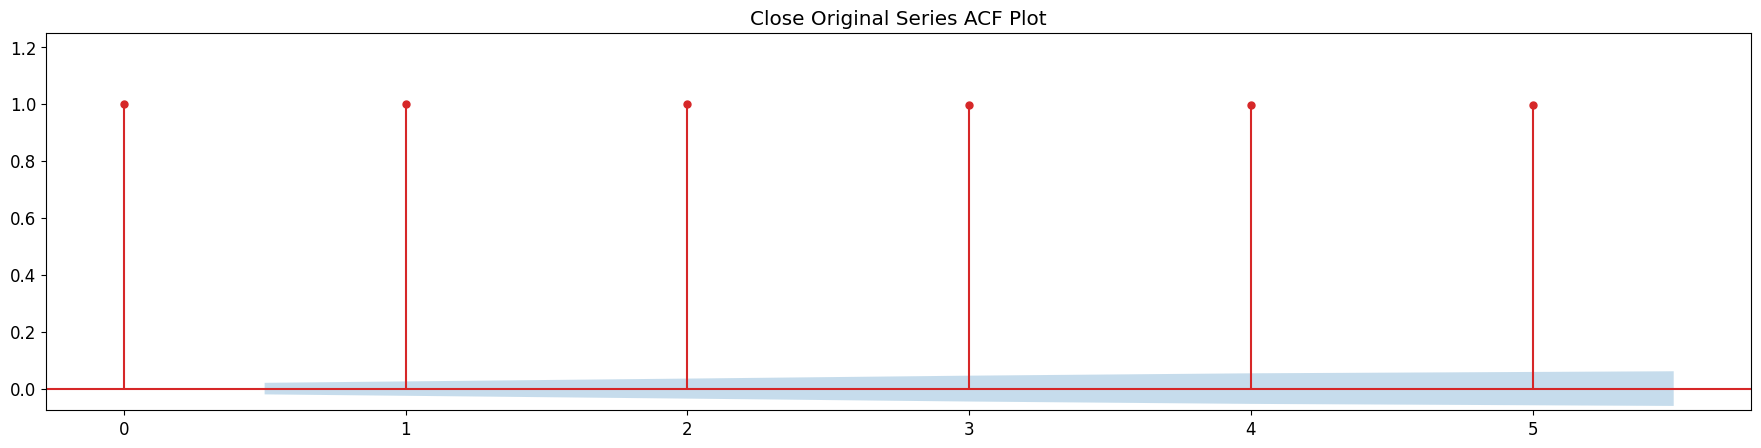

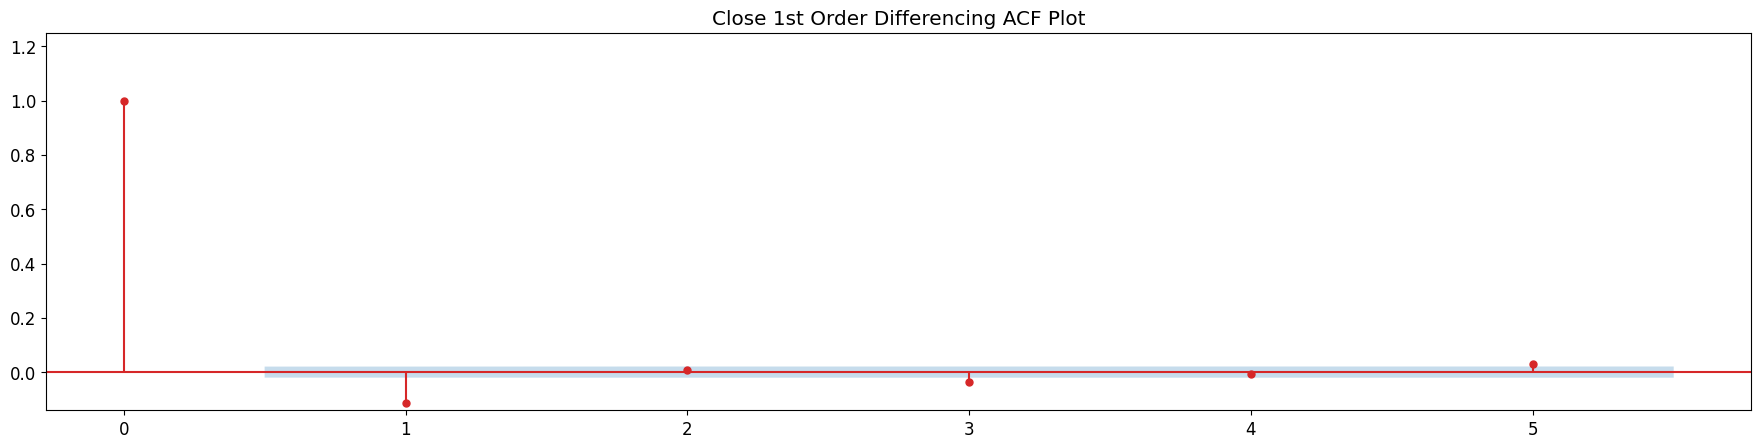

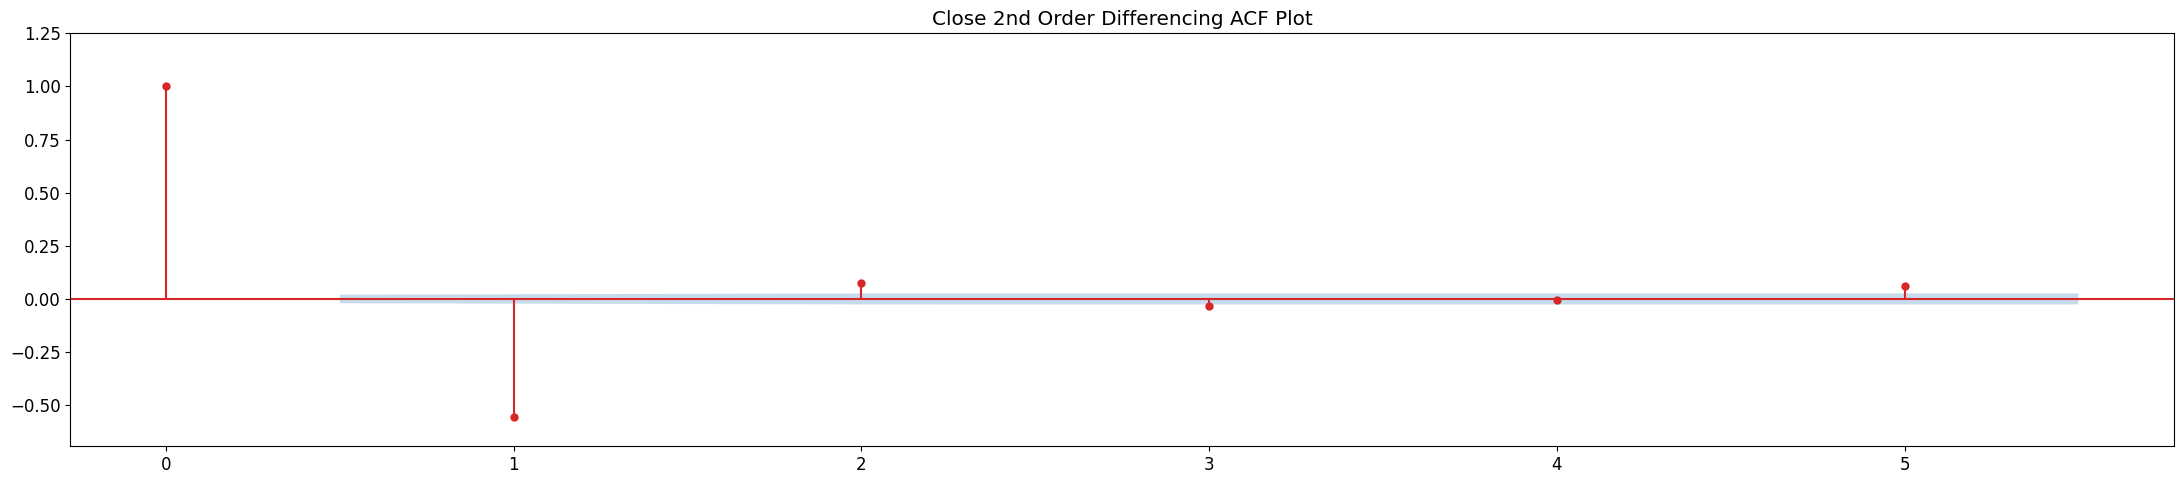

In [27]:
colors = plt.rcParams["axes.prop_cycle"]()

for i in columns:
    color = next(colors)["color"]
    plot_acf(stock_df[i], auto_ylims=True, lags = 5, title = f'{i} Original Series ACF Plot', color=color, 
              vlines_kwargs={"colors": color})

    plot_acf(stock_df[i].diff().dropna(),auto_ylims=True, 
              lags =5,title = f'{i} 1st Order Differencing ACF Plot', color=color, vlines_kwargs={"colors": color})

    plot_acf(stock_df[i].diff().diff().dropna(), auto_ylims=True, 
              lags =5,  title= f'{i} 2nd Order Differencing ACF Plot', color=color, vlines_kwargs={"colors": color})

plt.tight_layout()
plt.show()

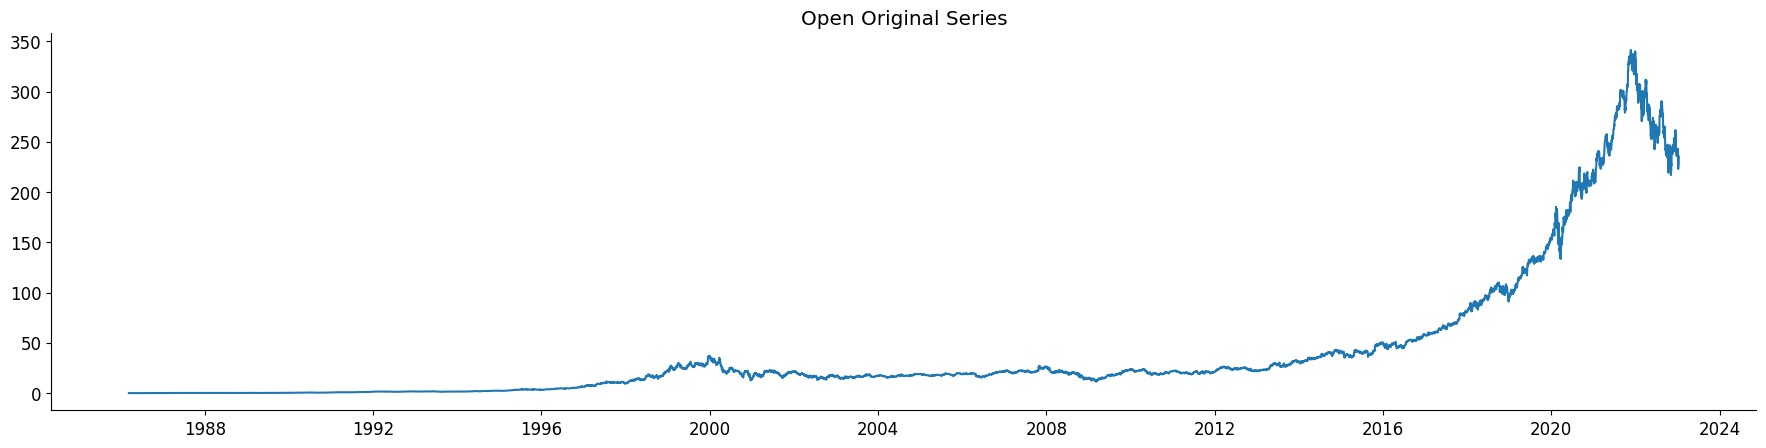

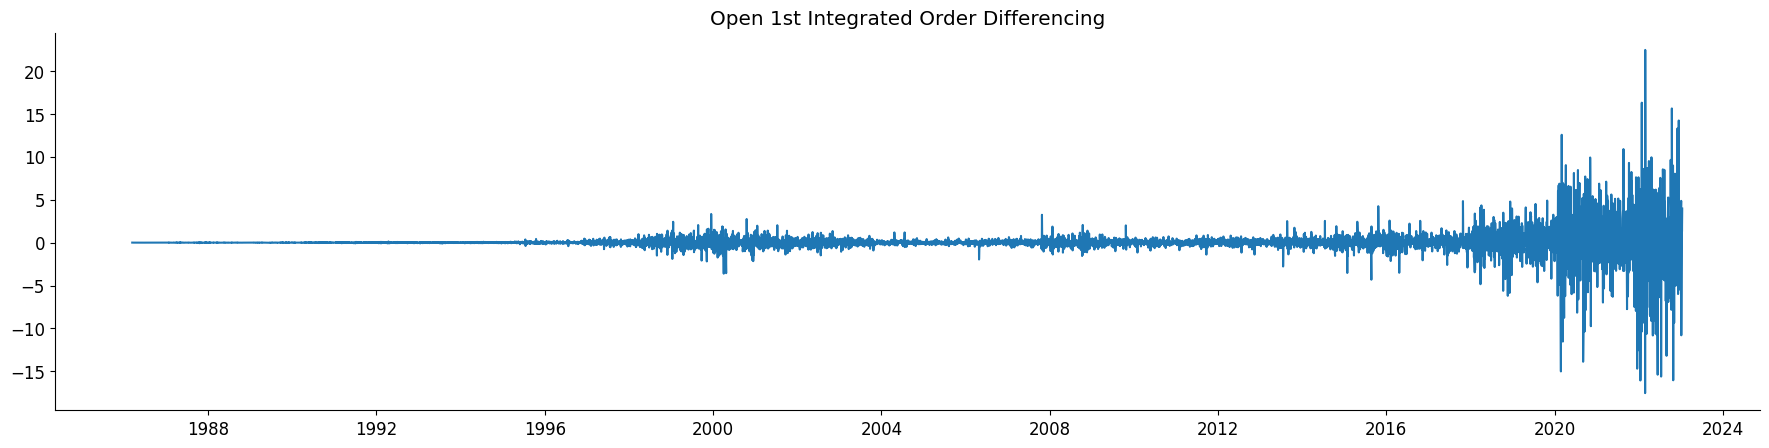

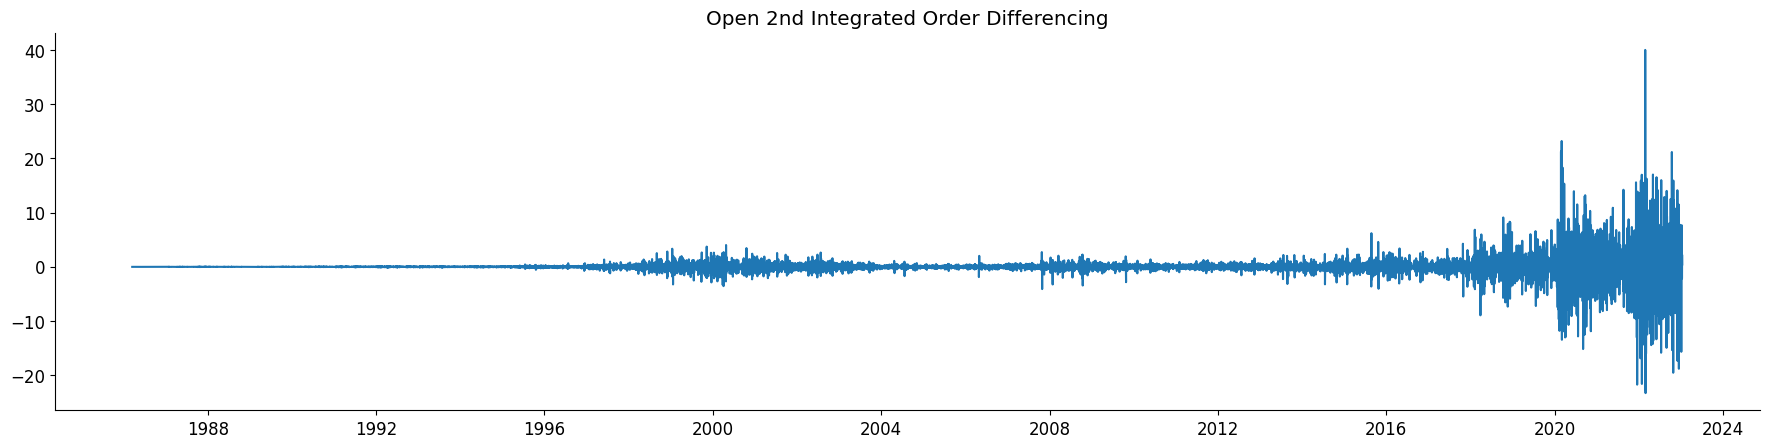

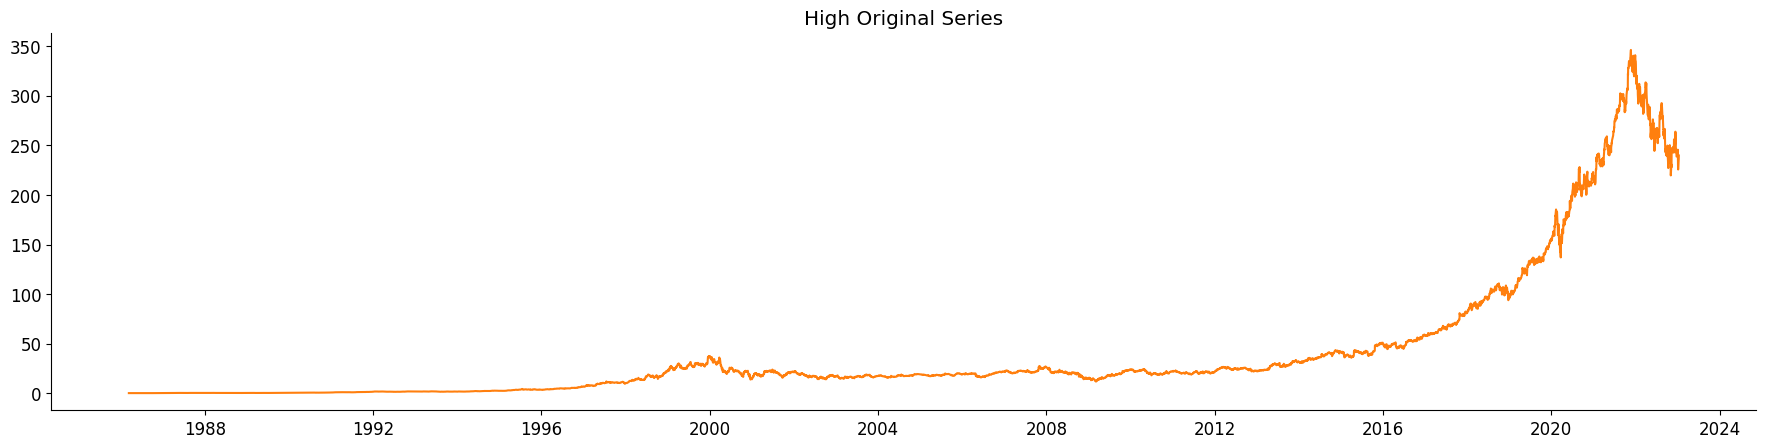

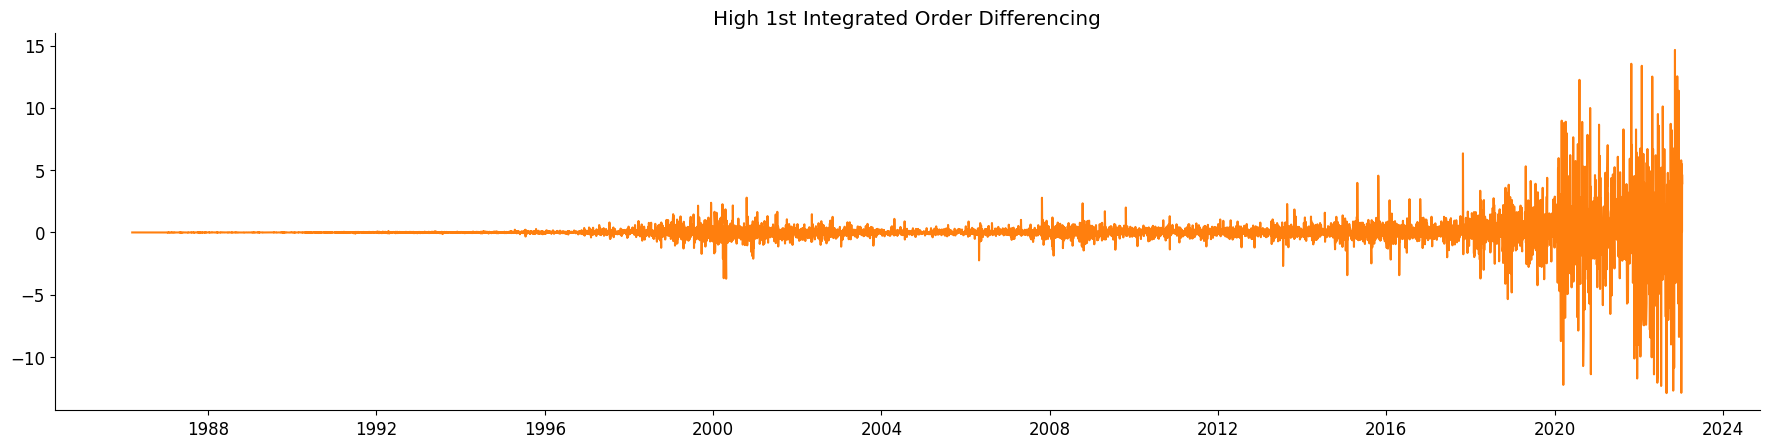

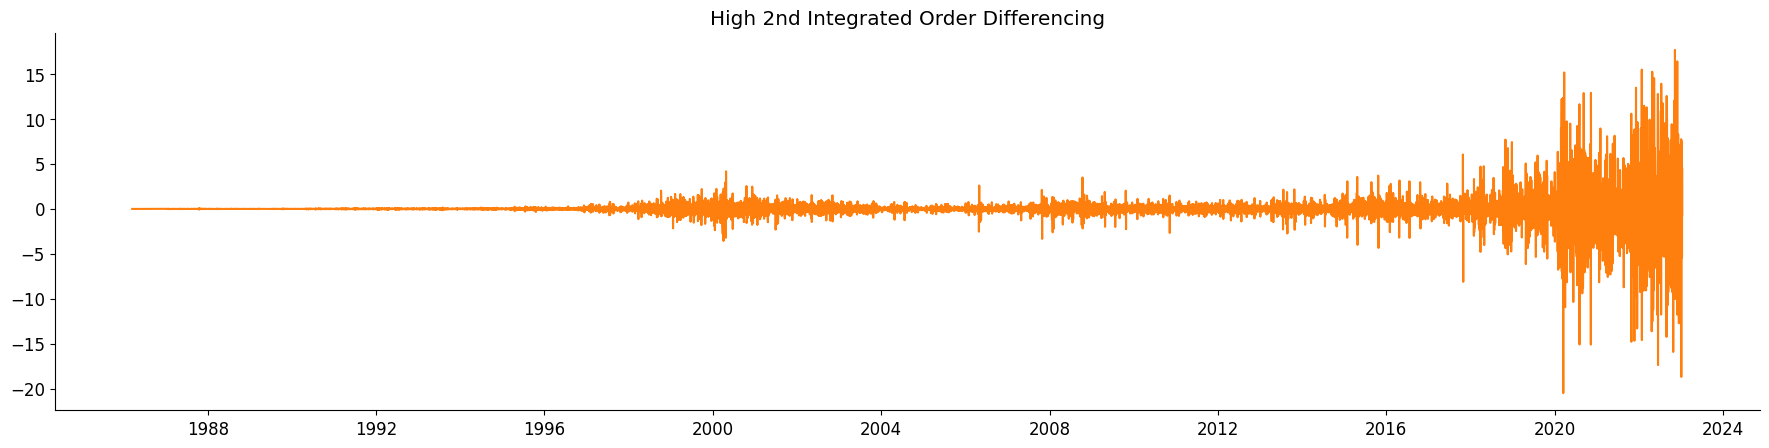

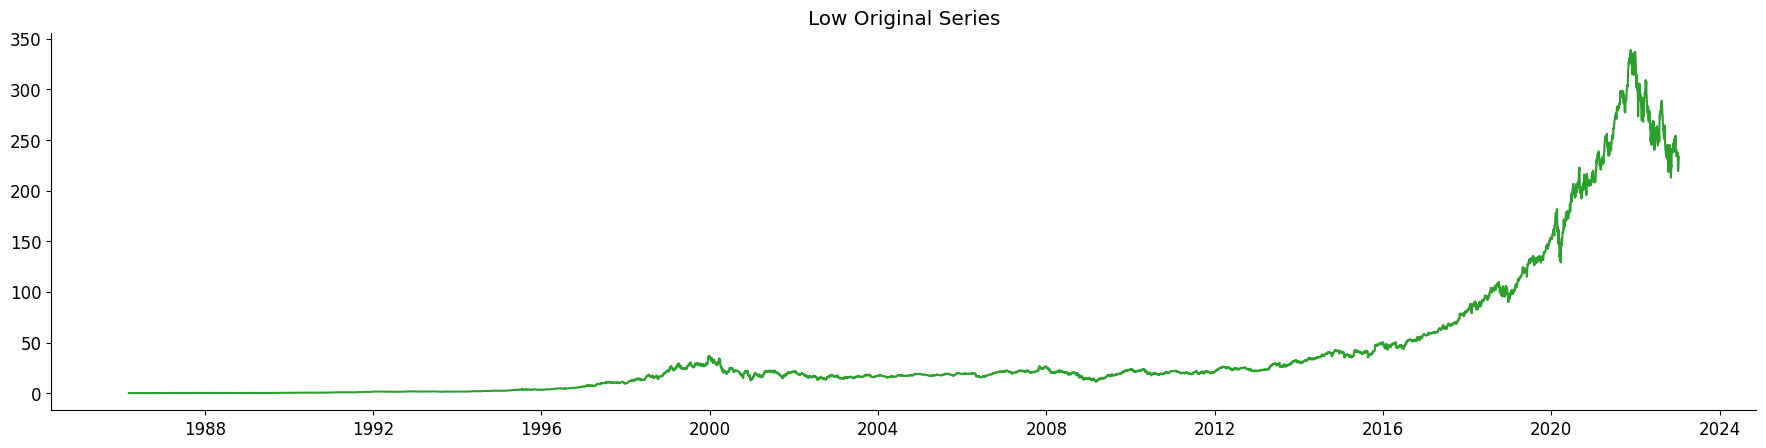

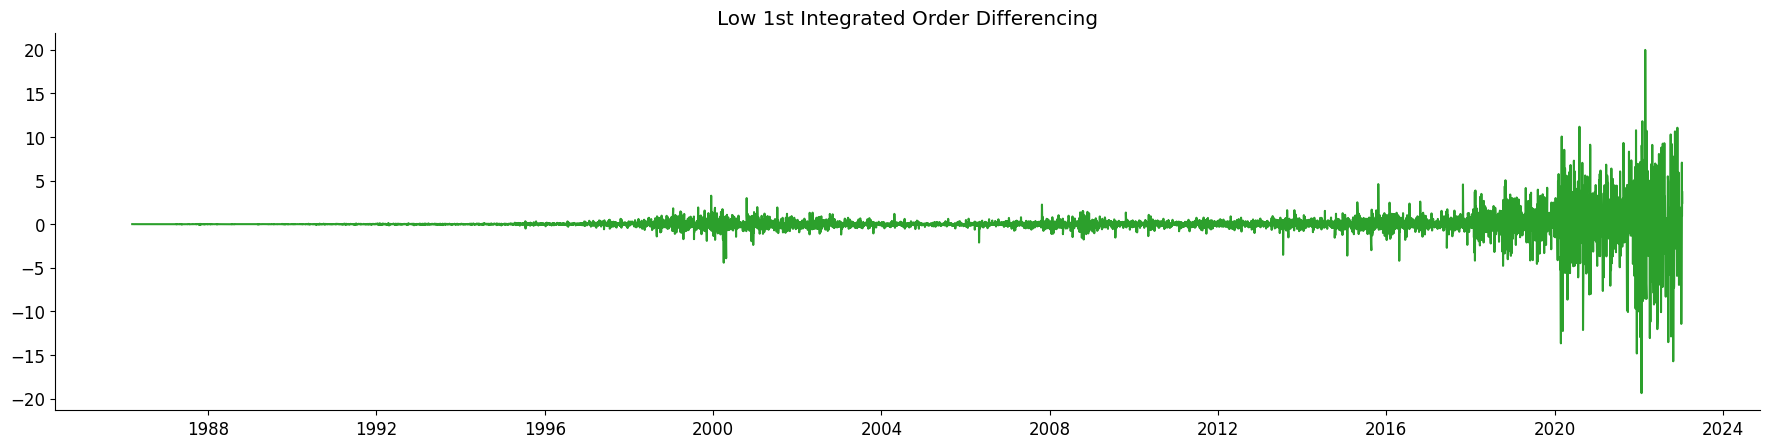

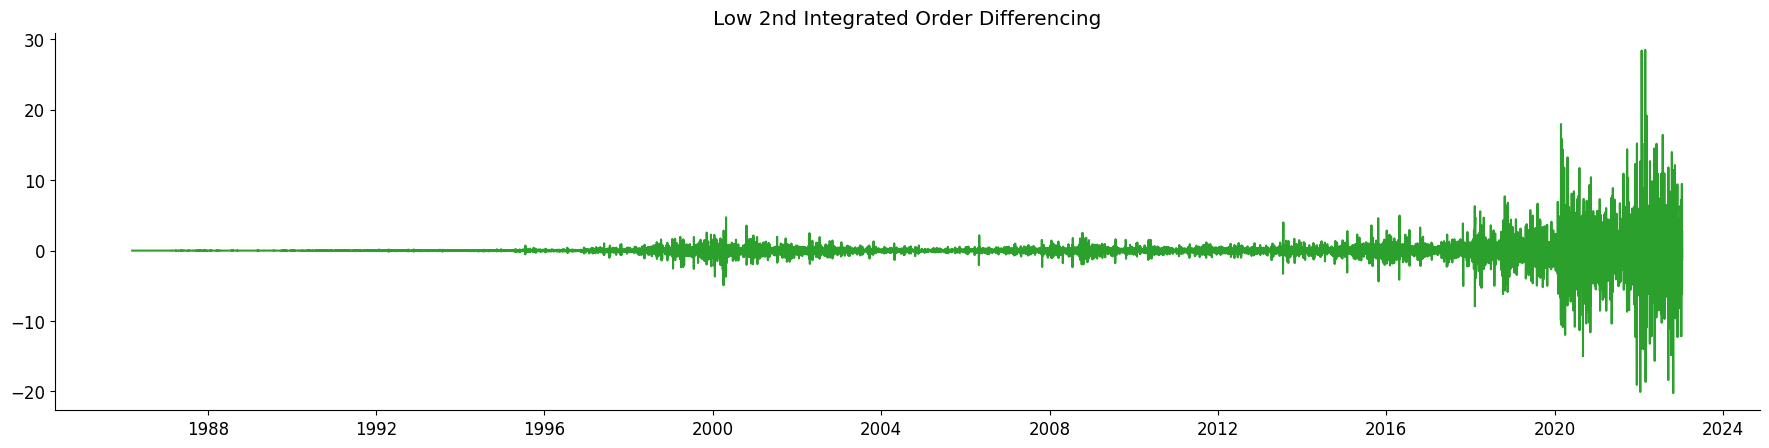

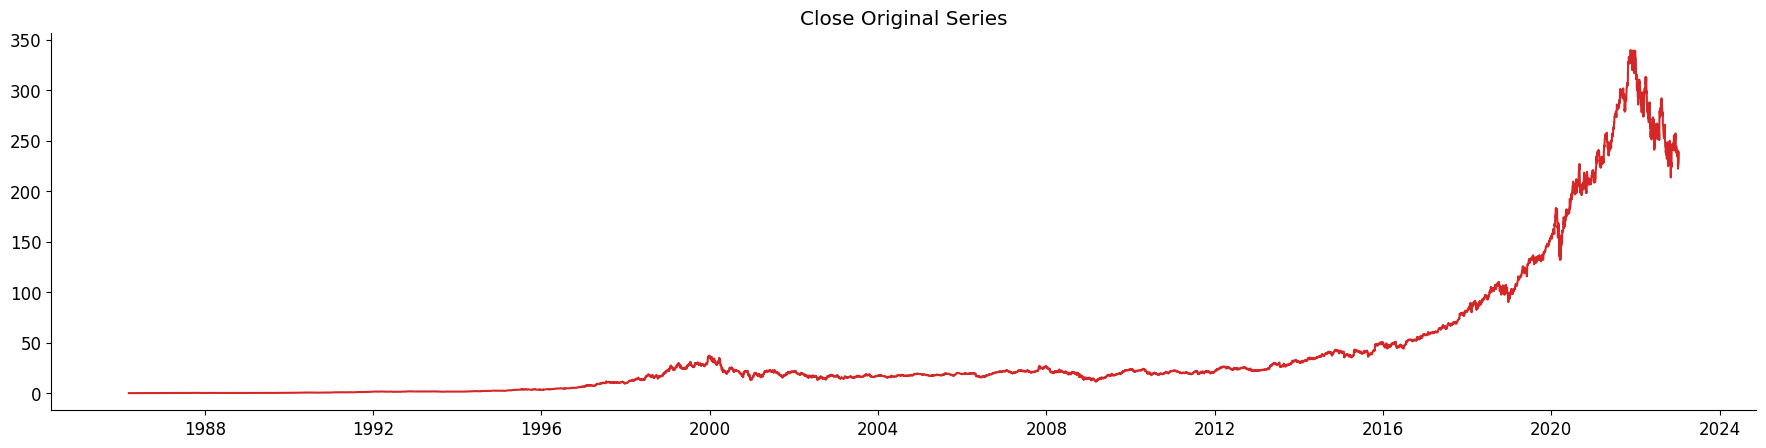

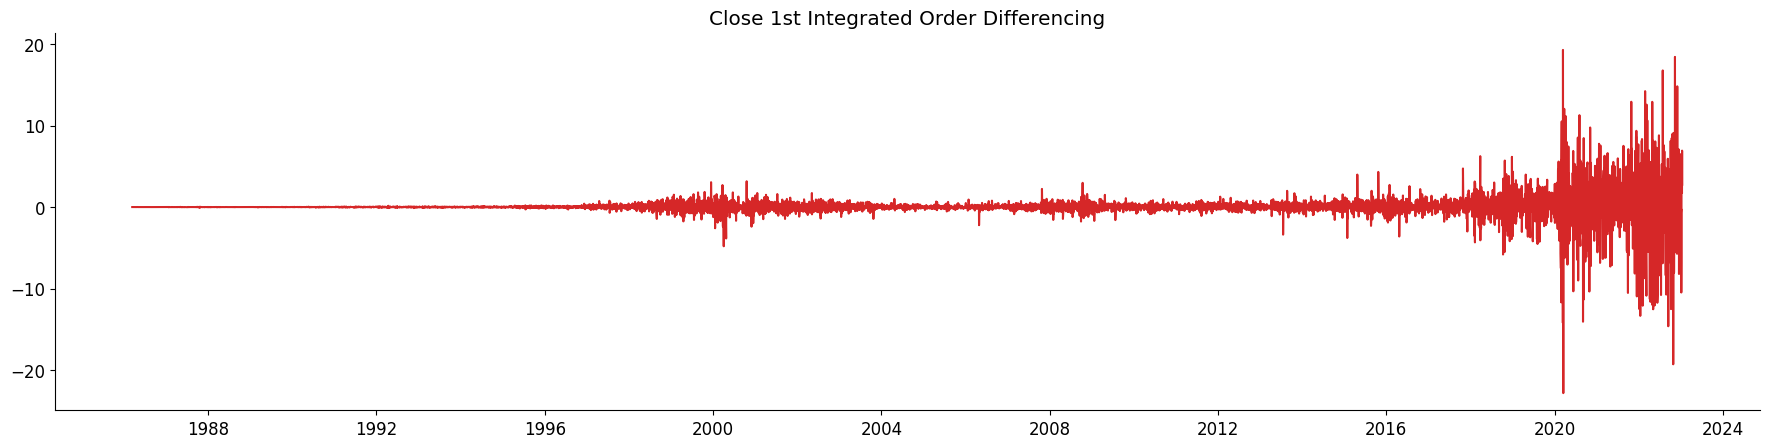

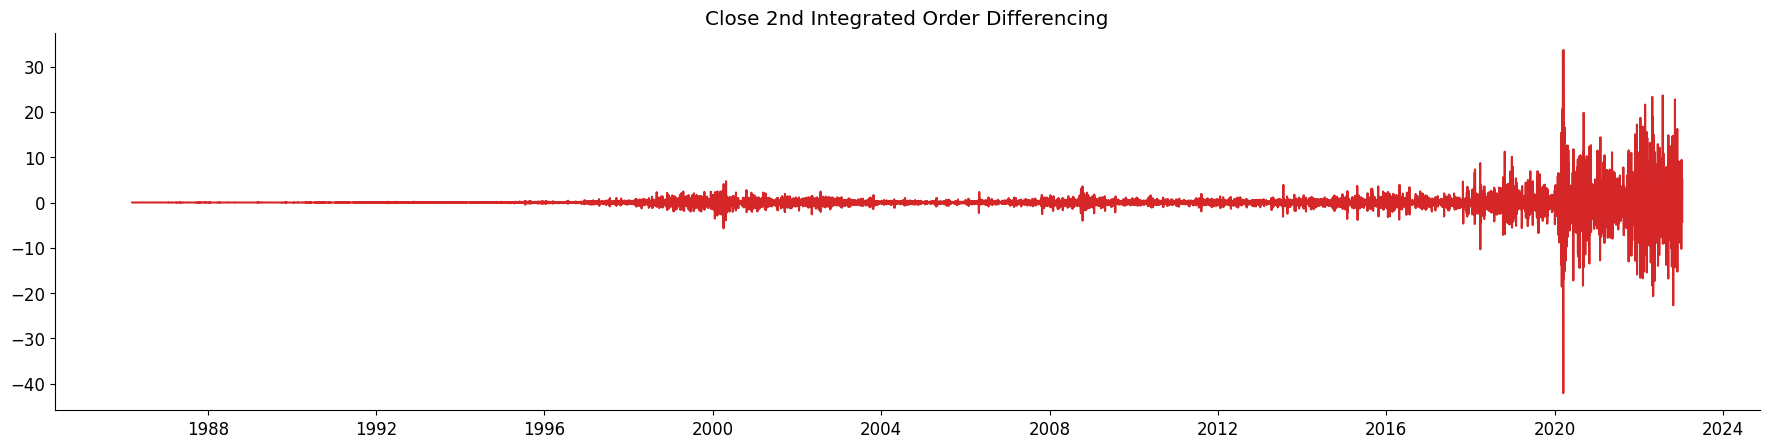

In [28]:
colors = plt.rcParams["axes.prop_cycle"]()

for i in columns:
    color = next(colors)["color"]
    
    plt.plot(stock_df[i], color=color)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.title(f'{i} Original Series')
    plt.show()

    # 1st Differencing    
    plt.plot(stock_df[i].diff(), color=color)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.title(f'{i} 1st Integrated Order Differencing')
    plt.show()

    # 2nd Differencing  
    plt.plot(stock_df[i].diff().diff(), color=color)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.title(f'{i} 2nd Integrated Order Differencing')
    plt.show()

In [29]:
train = stock_df[stock_df.index.year<2017]
test = stock_df[stock_df.index.year>=2017]

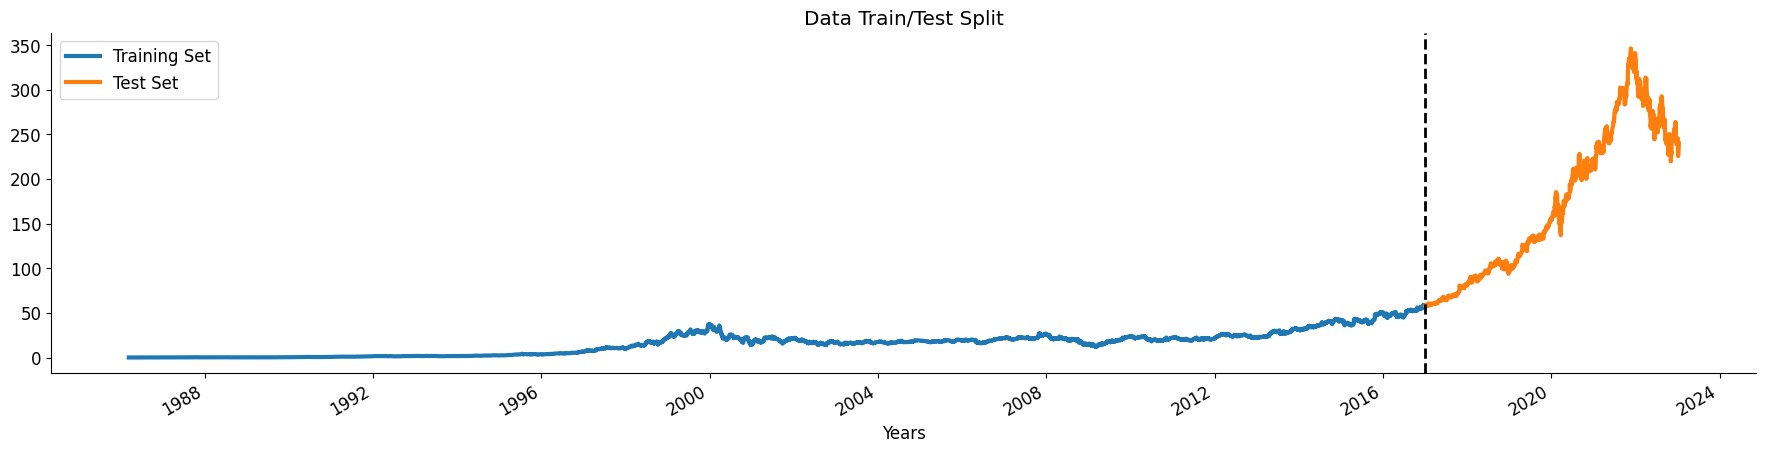

In [30]:
# Create a figure and an axis
fig, ax = plt.subplots()

# Plot the Volume column from the training set on the axis
train['High'].plot(ax=ax, label='Training Set', title='Data Train/Test Split', linewidth=3)

# Plot the Volume column from the test set on the axis
test['High'].plot(ax=ax, label='Test Set',  linewidth=3)

# Remove the top and right spines from the plot
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False);

# Add a vertical line to the plot at the threshold value
ax.axvline('2016-12-30', color='black', ls='--', lw=2)

# Add a legend to the plot
ax.legend(['Training Set', 'Test Set'])

# Label the x-axis
ax.set_xlabel('Years')

# Show the plot
plt.show()

In [31]:
print(f'There are {train.shape[0]} rows in the training set and {test.shape[0]} rows in the test set')

There are 7767 rows in the training set and 1518 rows in the test set


In [32]:
exogenous_features = ['Open', 'High', 'Low']

In [33]:
train

,Open,High,Low,Close
Date,,,,
1986-03-13 00:00:00-05:00,0.055380,0.063524,0.055380,0.060809
1986-03-14 00:00:00-05:00,0.060809,0.064067,0.060809,0.062980
1986-03-17 00:00:00-05:00,0.062980,0.064609,0.062980,0.064067
1986-03-18 00:00:00-05:00,0.064067,0.064609,0.061894,0.062437
1986-03-19 00:00:00-05:00,0.062437,0.062980,0.060809,0.061351
...,...,...,...,...
2016-12-23 00:00:00-05:00,58.446778,58.529681,57.848031,58.253338
2016-12-27 00:00:00-05:00,58.225689,59.017876,58.225689,58.290169
2016-12-28 00:00:00-05:00,58.400722,58.400722,57.875669,58.023052


In [34]:
import warnings 
warnings.filterwarnings('ignore')
model = sm.tsa.arima.ARIMA(endog=train['Close'], exog=train[exogenous_features], order=(1, 1, 2))          #(p,d,q)
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 7767
Model:                 ARIMA(1, 1, 2)   Log Likelihood                4591.759
Date:                Fri, 13 Jan 2023   AIC                          -9169.519
Time:                        07:23:14   BIC                          -9120.816
Sample:                             0   HQIC                         -9152.824
                               - 7767                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Open          -0.5731      0.005   -117.524      0.000      -0.583      -0.564
High           0.7910      0.004    210.343      0.000       0.784       0.798
Low            0.7823      0.004    216.503      0.000       0.775       0.789
ar.L1         -0.9065      0.118     -7.688      0.000      -1.138      -0.675
ma.L1         -0.0949      0.120     -0.788      0.431      -0.331       0.141
ma.L2         -0.8992      0.120     -7.486      0.000      -1.135      -0.664
sigma2         0.0179      0.000    131.004      0.000       0.018       0.018
===================================================================================
Ljung-Box (L1) (Q):                  10.28   Jarque-Bera (JB):             22067.87
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):             164.15   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
train['Predictions'] = model_fit.predict()

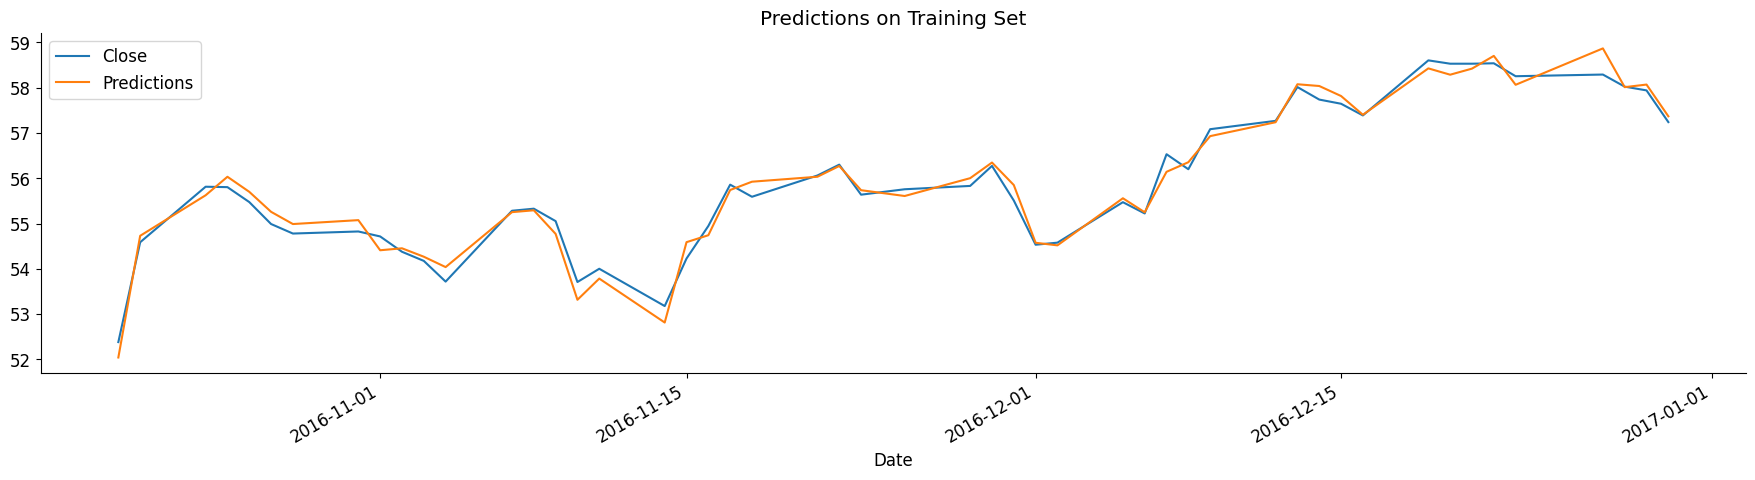

In [36]:
train[['Close', 'Predictions']][-50:].plot()
plt.title('Predictions on Training Set')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [37]:
import warnings 
warnings.filterwarnings('ignore')
#Making Predictions on Test Set
forecast = [model_fit.forecast(exog=test[exogenous_features].iloc[i]).values[0] for i in range(len(test))]

In [38]:
test['Forecast'] = forecast

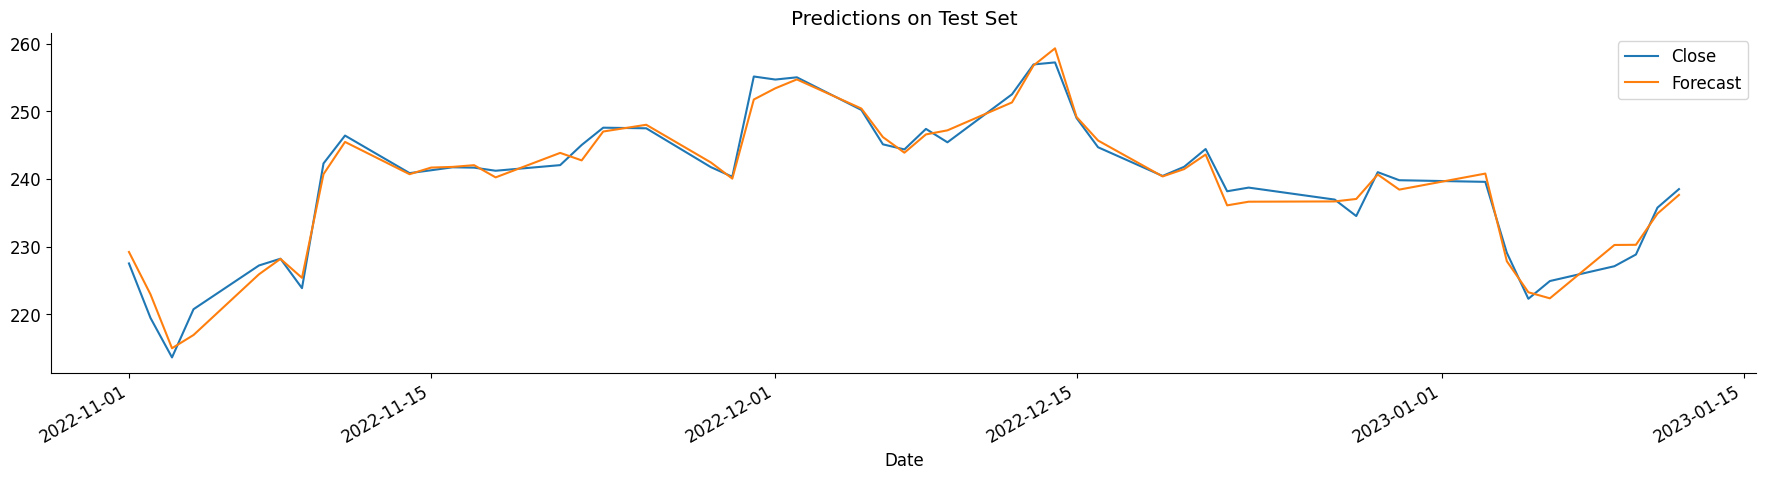

In [39]:
test[['Close','Forecast']][-50:].plot()
plt.title('Predictions on Test Set')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.show()

In [40]:
rmse = np.sqrt(mean_squared_error(test['Close'],test['Forecast']))
print(f'The RMSE for Multivariate ARIMAX is {round(rmse,4)}')

The RMSE for Multivariate ARIMAX is 1.2756
